## **Оглавление:**
- [Шаг 1. Откроем файл с данными и изучим общую информацию](#id-section1) <div id='id-section24'/>
- [Вывод](#id-section2)<div id='id-section25'/>


- [Шаг 2. Подготовим данные к анализу](#id-section3) <div id='id-section26'/>
- [Изменим названия столбцов](#id-section4) <div id='id-section27'/>
- [Обработаем дубликаты](#id-section5) <div id='id-section28'/>
- [Вывод](#id-section6) <div id='id-section29'/>


- [Шаг 3. Проведем исследовательский анализ данных (EDA)](#id-section7) <div id='id-section30'/>
- [Изучим средние значения и стандартные отклонения по всем признакам](#id-section8) <div id='id-section31'/>
- [Изучим средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался](#id-section9) <div id='id-section32'/>
- [Построим столбчатые гистограммы и распределения признаков для тех, кто ушел в отток и тех, кто остался](#id-section10) <div id='id-section33'/>
- [Построим матрицу корреляций](#id-section11) <div id='id-section34'/>
- [Вывод](#id-section12) <div id='id-section35'/>


- [Шаг 4. Построим модель прогнозирования оттока клиентов](#id-section13) <div id='id-section36'/>
- [Интерпретируем модель](#id-section14) <div id='id-section37'/>
- [Вывод](#id-section15) <div id='id-section38'/>


- [Шаг 5. Сделаем кластеризацию клиентов](#id-section16) <div id='id-section39'/>
- [Построим матрицу расстояний и нарисуем дендрограмму](#id-section17) <div id='id-section40'/>
- [Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов](#id-section18) <div id='id-section41'/>
- [Посмотрим на средние значения признаков для кластеров](#id-section19) <div id='id-section42'/>
- [Построим распределения признаков для кластеров](#id-section20) <div id='id-section43'/>
- [Посчитаем долю оттока клиентов для кластеров](#id-section21) <div id='id-section44'/>
- [Вывод](#id-section22) <div id='id-section45'/>


- [Шаг 6. Сформулируем выводы и рекомендации по работе с клиентами](#id-section23) <div id='id-section46'/>



<div id='id-section1'/>

## [Шаг 1. Откроем файл с данными и изучим общую информацию](#id-section24)

Импортируем необходимые библиотеки.

Применим метод `head(10)`, чтобы вывести на экран 10 строк из таблицы.

Также сразу посмотрим, какие типы данных хранятся в таблице, воспользуемся методом `info()`.

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import silhouette_score

try:
    df = pd.read_csv('/datasets/gym_churn.csv')
except:
    df = pd.read_csv('gym_churn.csv')

display(df.head(10))
df.info()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


<div id='id-section2'/>

### [Вывод](#id-section25)

Таблица `df` - массив данных, в котором хранится 4 тыс. строк. 

13 столбцов - это признаки для целевой переменной `Churn` (14-й столбец). 

Пропущенных значений в таблице нет. 

- Категориальная переменная `gender` с типом данных `int64` - это корретно.

- Логические переменные `Near_Location`, `Partner`, `Promo_friends`, `Phone`, `Group_visits`, `Churn` (целевая переменная) имеют тип данных `int64` - для нашего анализа это корретно.

- Количественные переменные `Contract_period`, `Age`, `Avg_additional_charges_total`, `Month_to_end_contract`, `Lifetime`, `Avg_class_frequency_total`, `Avg_class_frequency_current_month` с типами данных `int64` и `float64` - корректно.

Мы можем сделать заключение, что для дальнейшей работы типы данных менять не требуется. 

Однако для удобства стоит сделать названия столбцов со строчными буквами. 

<div id='id-section3'/>

## [Шаг 2. Подготовим данные к анализу](#id-section26)

<div id='id-section4'/>

### [Изменим названия столбцов](#id-section27)

Применим метод `lower()` к каждому названию + выполним проверку. 

In [2]:
df.columns = [x.lower() for x in df.columns]

display(df.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

<div id='id-section5'/>

### [Обработаем дубликаты](#id-section28)

Поищем **полные** дубликаты в таблице методом `duplicated().sum()`, что позволит нам посчитать общее количество дубликатов. 

In [3]:
display(df.duplicated().sum())

0

<div id='id-section6'/>

### [Вывод](#id-section29)

На данном этапе мы:
- сделали названия столбцов более удобными, со строчными буквами;
- проверили, что полные дубликаты в таблице отсутствуют.

<div id='id-section7'/>

## [Шаг 3. Проведем исследовательский анализ данных (EDA)](#id-section30)



<div id='id-section8'/>

### [Изучим средние значения и стандартные отклонения по всем признакам](#id-section31)

На ***Шаге 1.*** мы уже убедились, что в датасете нет отсутствующих признаков.

Вызовем метод `describe()` и изучим средние значения и стандартные отклонения по всем признакам.

In [4]:
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Отрицательных значений и крупных аномальных выбросов в данных не наблюдается (судя по значениям `min` и `max`).

- Среднее значение для признака `gender` (0.51) говорит о том, что в датасете примерно одинаковое количество анкет для мужчин и женщин.
- Также примерно поровну разделились клиенты на тех, кто является и не является сотрудником компании-партнера клуба (среднее значение признака `partner` = 0.48).
- Большинство клиентов проживают или работают в районе, где находится фитнес-центр, а также почти всегда оставляют свой контактный телефон. 
- Акция «приведи друга» (использование промо-кода от знакомого при оплате первого абонемента) не пользуется большой популярностью, таких клиентов меньше, чем обычных (среднее значение признака `promo_friends` = 0.30).
- Средный возраст клиента равен 29 годам, длительность его текущего действующего абонемента (`contract_period`) - почти 5 месяцев, со сроком окончания через 4 месяца (`month_to_end_contract`). 
- Время с момента первого обращения клиента в фитнес-центр (`lifetime`) в среднем равно 4 месяцам.
- Средняя частота посещений фитнес-центра в среднем составляет примерно 2 раза в неделю.
- Клиент в среднем приносит 146 единиц (в документации к данным не представлена точная мера измерения) суммарной выручки от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

<div id='id-section9'/>

### [Изучим средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался](#id-section32)

Воспользуемся методом `groupby()` для вывода средних значений для каждой группы по признаку `churn`.

In [5]:
display(df.groupby('churn').mean().transpose())

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


- Мы видим, что различий по признаку пола в двух группах нет - и среди ушедших, и среди оставшихся клиентов примерно равное количество мужчин и женщин.
- Также нет отличий и по признаку оставления контактного телефона (скорее всего, это условие обязательно для записи в фитнес-центр).
- Практически нет различия по признаку `near_location`: уже на этапе выбора клиенты всегда предпочитают фитнес-центр рядом с работой или домом. 
- Клиенты, которые не ушли в отток, чаще являются сотрудниками компании-партнера клуба или пришли по акции «приведи друга» - видимо, это дает им преференции, которые не позволяют отказаться от посещения фитнес-центра. 
- Клиенты, которые продолжают ходить в фитнес-центр, на 3 года старше тех, кто ушел в отток (с возрастом необходимость регулярно заниматься спортом и следить за физической формой повышается). 
- У оставшихся клиентов больше длительность текущего действующего абонемента (5.7 мес. против 1.7 мес.). Верояно, сказывается их уверенность в том, что они не перестанут ходить в фитнес-центр, поэтому и абонемент они покупают на подольше. А ушедшие клиенты, наоборот, не уверены в том, захотят ли они и дальше посещать именно этот фитнес-центр, поэтому они покупают "пробный" короткий абонемент. 
- Об этом же говорит и показатель `month_to_end_contract` - оставшиеся клиенты уверенно покупают длительные абонементы, в отличие от ушедших. А чем больше длительность абонемента, тем выше срок до его окончания. У коротких абонементов срок до окончания всегда будет маленьким.
- Оставшиеся клиенты в среднем ходят на фитнес дольше, чем ушедшие (4.71 мес. против 0.99). Этот фактор связан с длительностью абонементов у двух групп.
- Чем дольше клиенты посещают фитнес-центр, тем выше их дополнительные траты на другие услуги фитнес-центра: кафе, спорт-товары, косметический и массажный салон. Этим объясняется разница в показателе `avg_additional_charges_total` для оставшихся и ушедших клиентов.
- Также оставшиеся клиенты больше мотивированы на посещение спортзала, чем ушедшие - показатели `avg_class_frequency_total` и `avg_class_frequency_current_month` для первых составляют 2 раза в неделю против 1 раза в неделю для вторых.

<div id='id-section10'/>

### [Построим столбчатые гистограммы и распределения признаков для тех, кто ушел в отток и тех, кто остался](#id-section33)

Для удобства расположим рядом по 2 гистограммы по каждому признаку для оставшихся и ушедших клиентов - используем метод `plt.subplots()`.

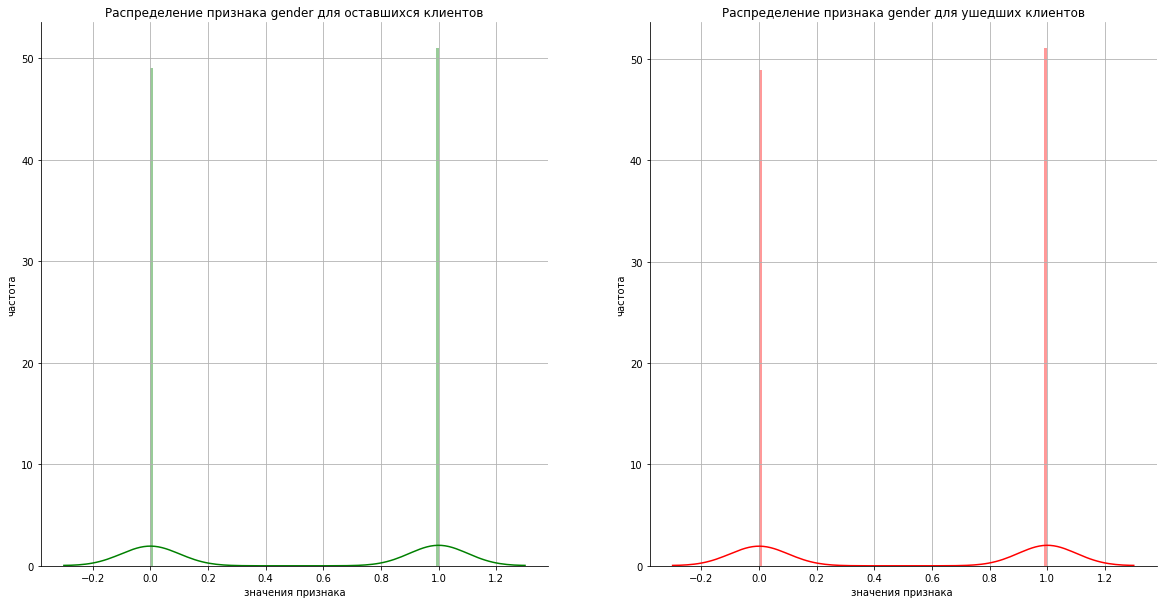

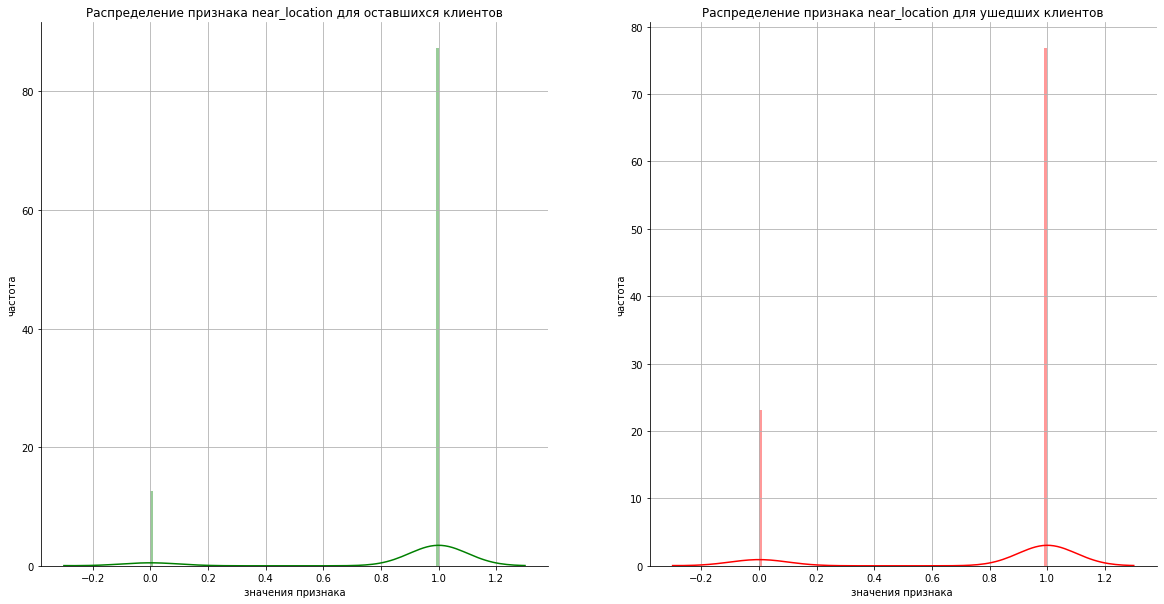

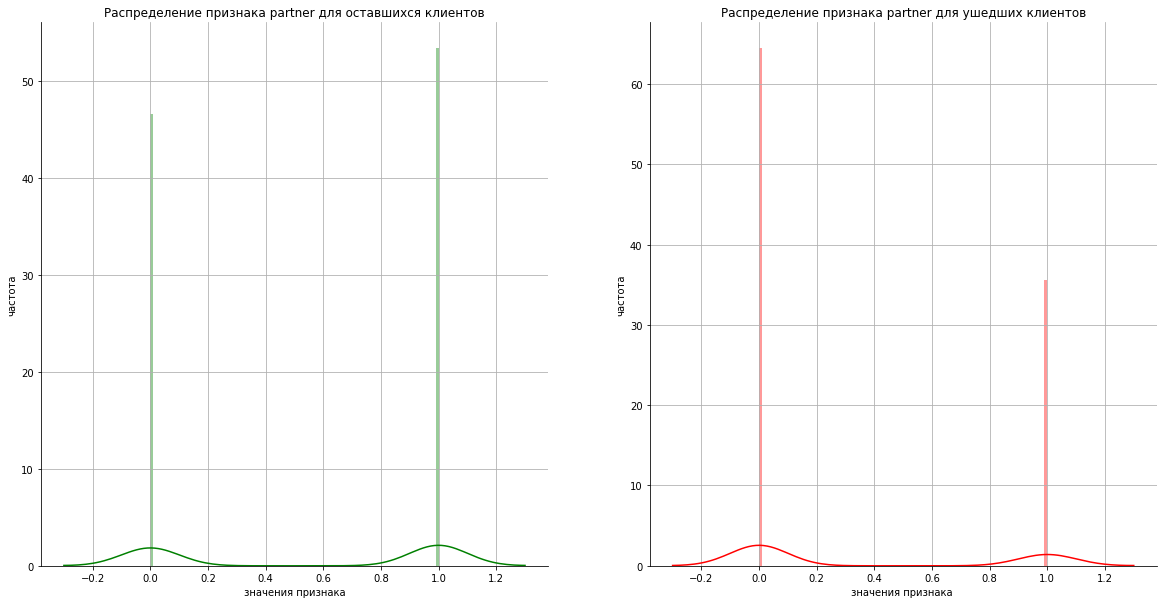

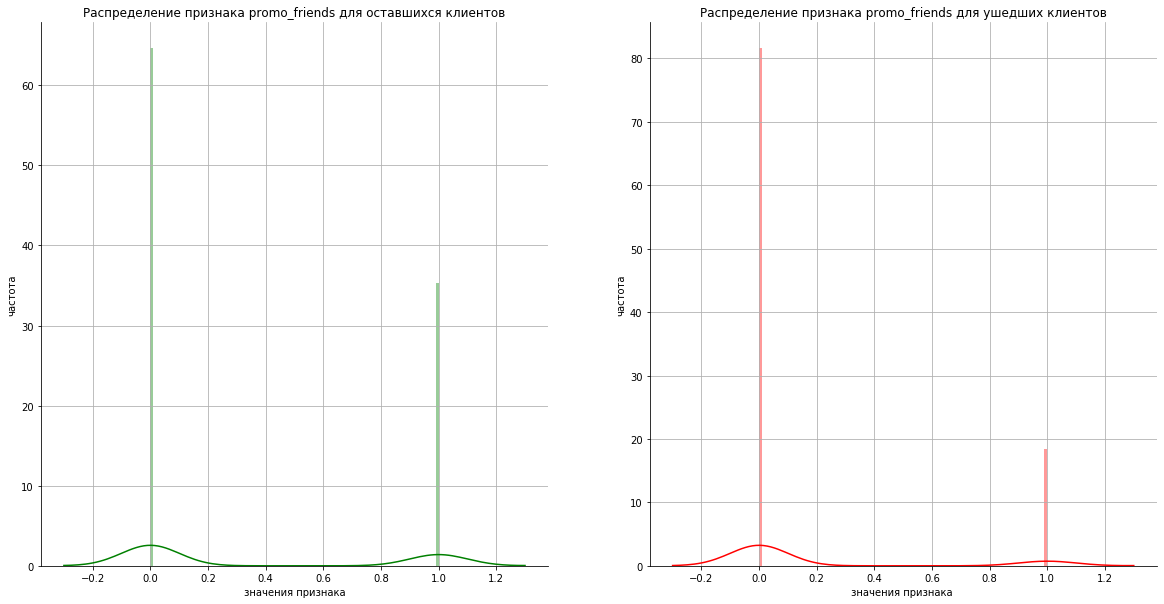

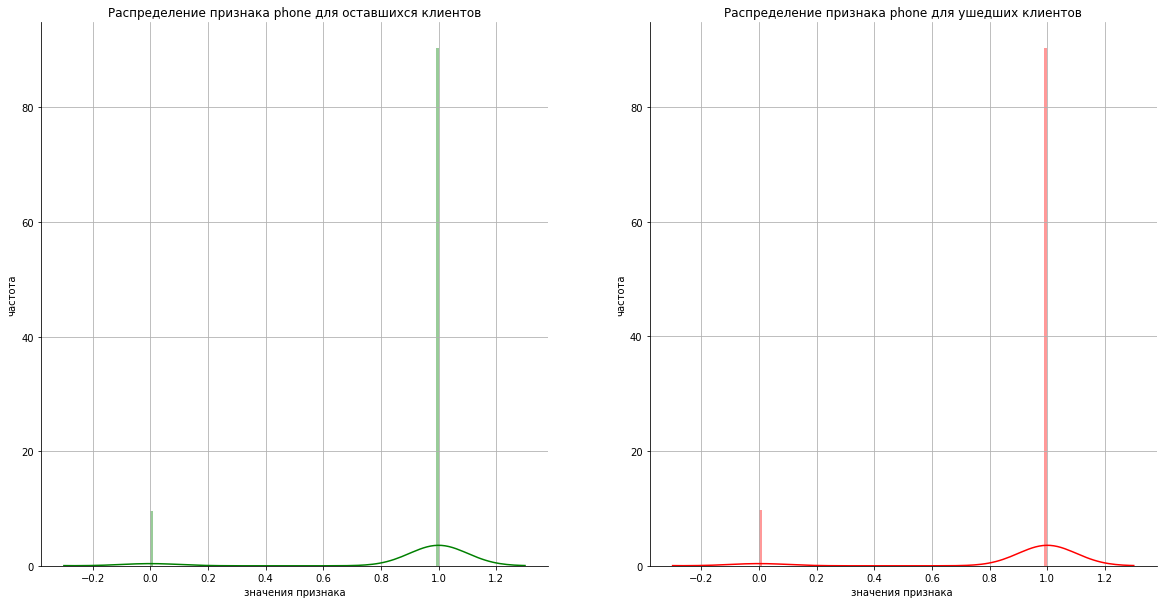

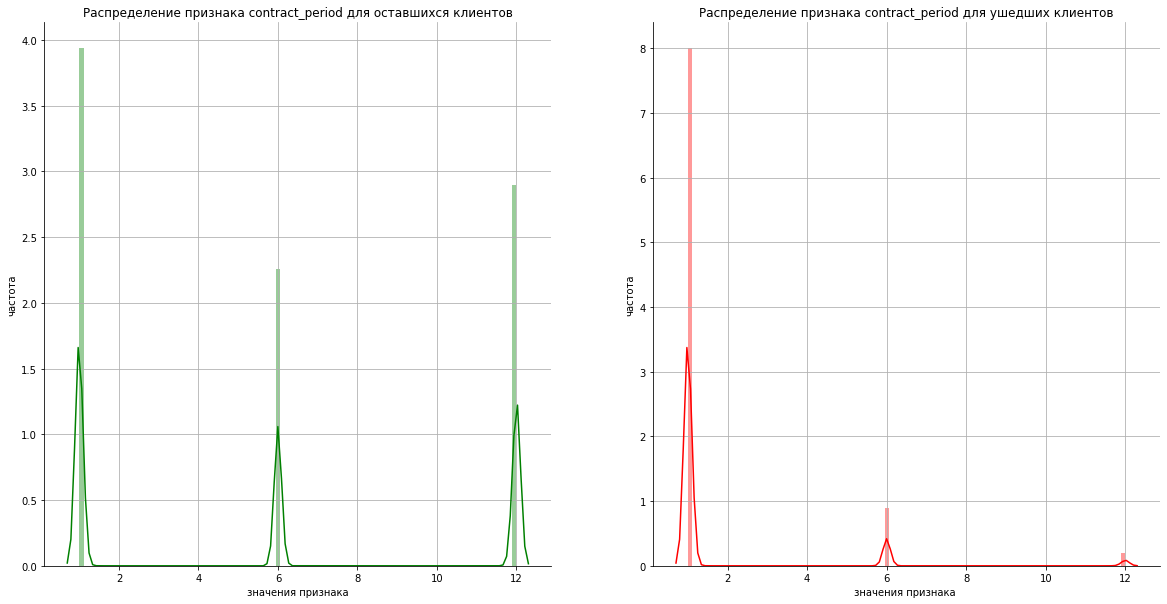

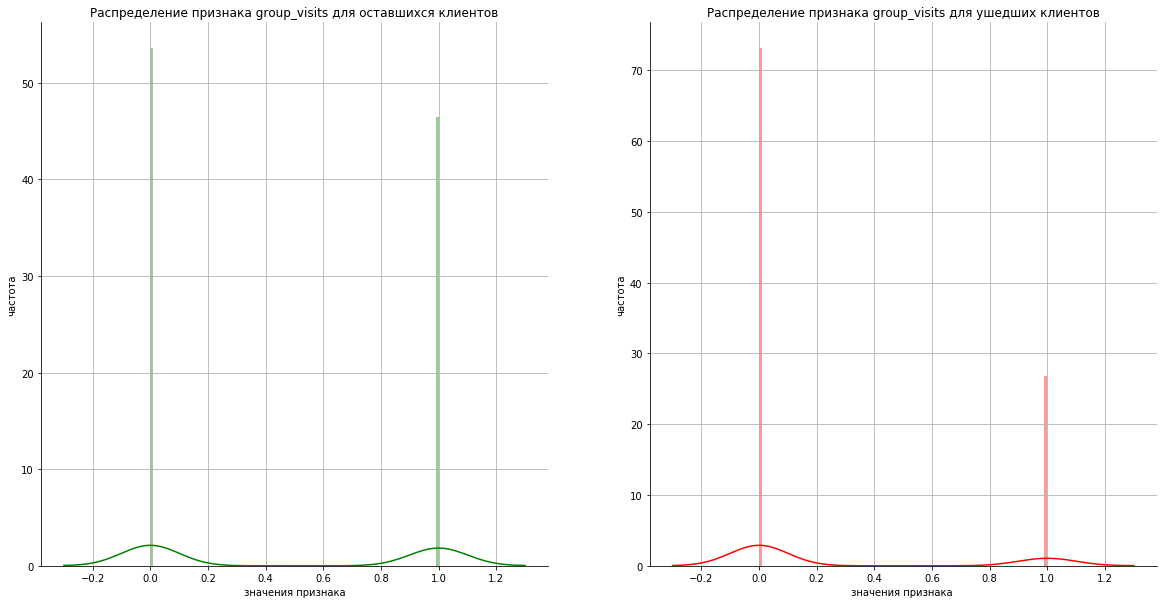

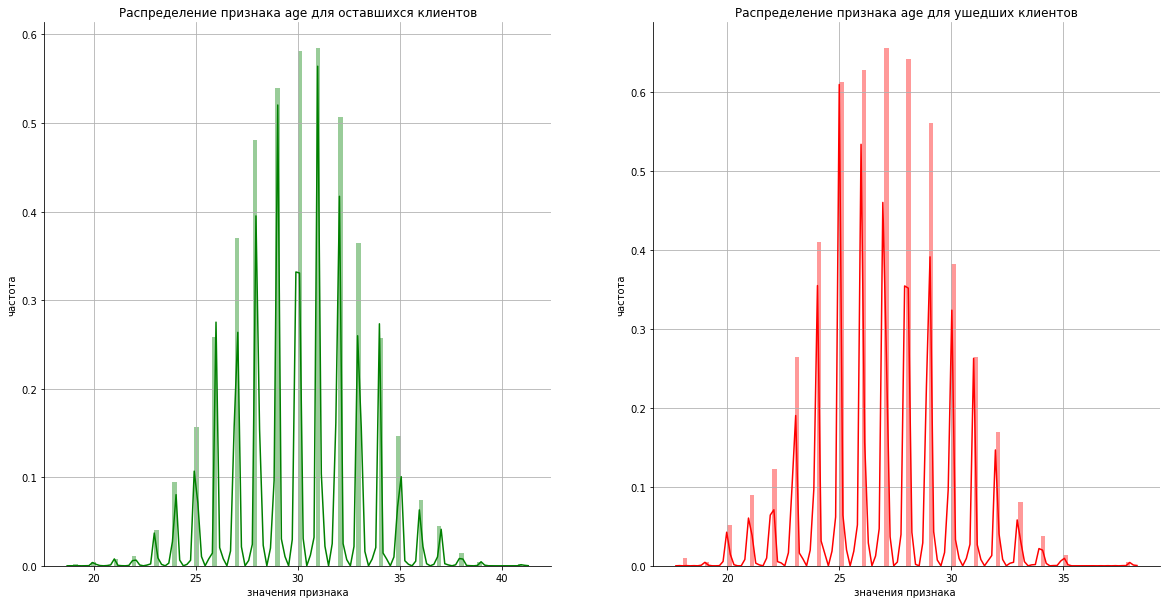

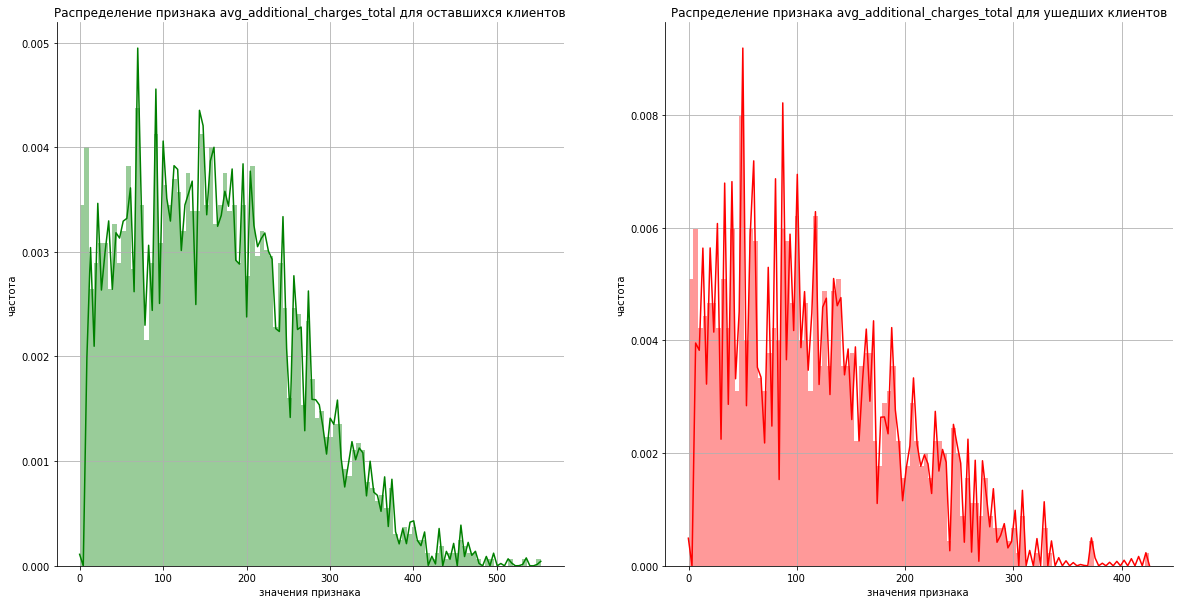

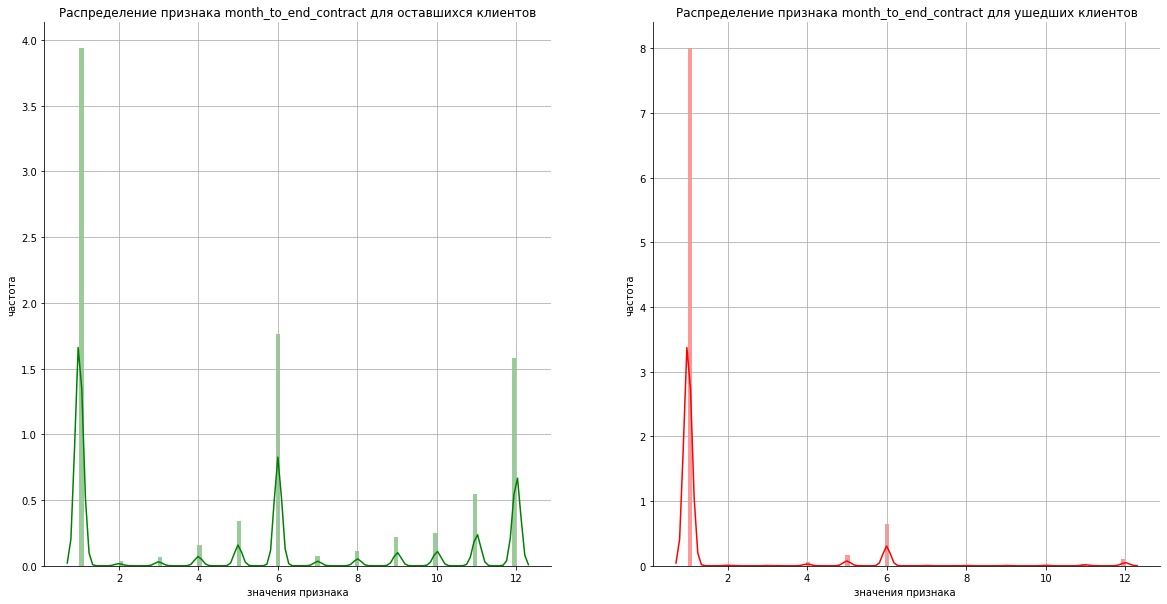

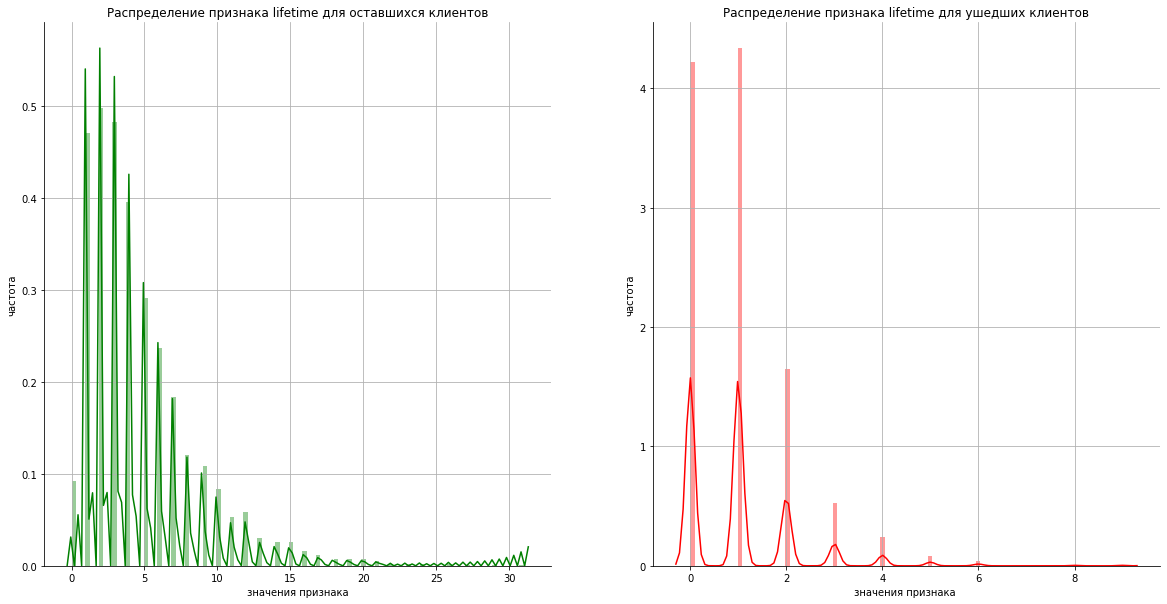

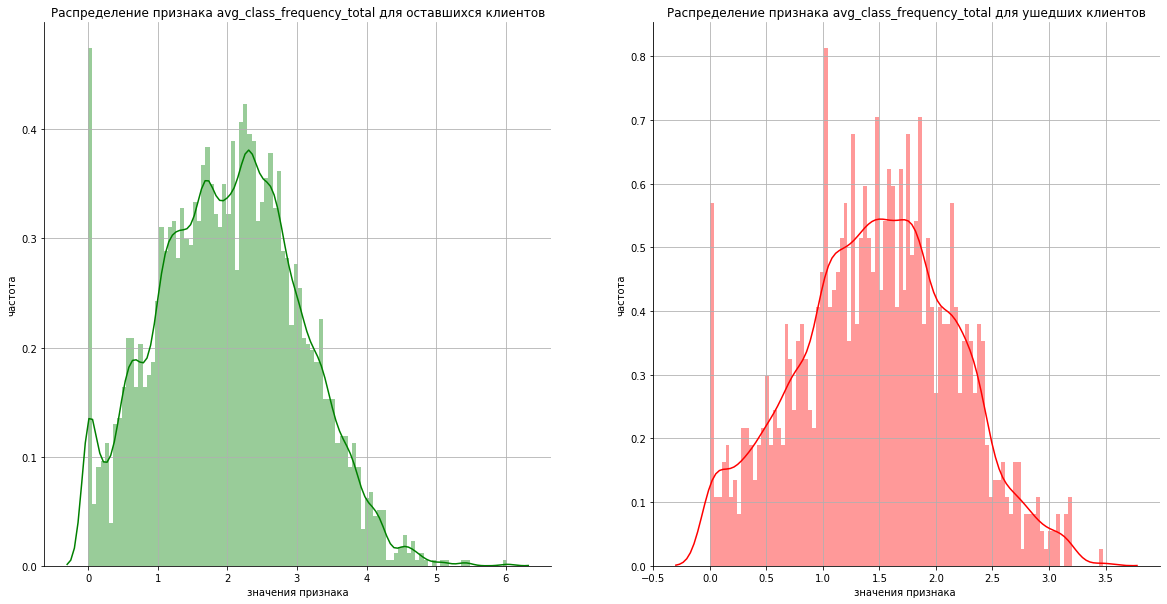

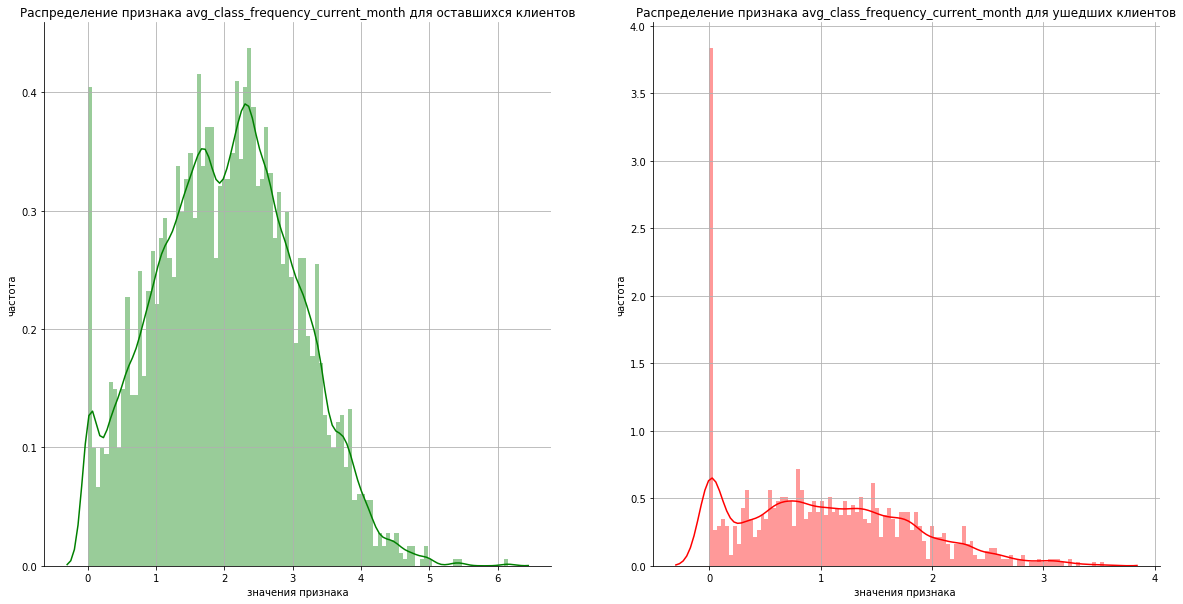

In [6]:
for col in df.drop('churn', axis = 1).columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
    sns.distplot(df.query('churn == 0')[col], bins = 100, color = 'green', kde_kws = {'bw':0.1}, ax = ax1)
    ax1.set_xlabel('значения признака')
    ax1.set_ylabel('частота')
    ax1.set_title(f'Распределение признака {col} для оставшихся клиентов')
    ax1.grid()
    sns.despine()

    sns.distplot(df.query('churn == 1')[col], bins = 100, color = 'red', kde_kws = {'bw':0.1}, ax = ax2)
    ax2.set_xlabel('значения признака ')
    ax2.set_ylabel('частота')
    ax2.set_title(f'Распределение признака {col} для ушедших клиентов')
    ax2.grid()
    sns.despine()

- Судя по гистограммам, подтверждаются тенденции, замеченные нами ранее для признаков: `gender`, `phone`, `near_location` (показатель для ушедших клиентов, у которых фитнес не был рядом с работой или домом, немного выше - возможно, это и явилось причиной их ухода - но в целом для обеих групп тенденция на выбор фитнеса рядом четко прослеживается).
- Распределение признаков `partner` и `promo_friends` снова свидетельствует о том, что оставшиеся клиенты чаще являются сотрудниками компании-партнера клуба или пришли по акции «приведи друга» - такие клиенты получают больше преимуществ и, как следствие, более лояльны.
- Гистограмма для признаков `contract_period` и `month_to_end_contract` снова показывает, что оставшиеся клиенты чаще оформляют абонементы на более длительные сроки (6 или 12 месяцев), чем ушедшие. Видимо, как только у клиента появляется уверенность в желании посещать именно этот фитнес-центр, сразу принимается решение о покупке долгосрочного абонемента, так как это выгодно. А чем больше длительность абонемента, тем выше срок до его окончания. У коротких абонементов срок до окончания всегда будет маленьким.
- Оставшиеся клиенты охотнее посещают групповые занятия, чем ушедшие. Возможно, это более второстепенный формат, на первом месте для клиентов все же индивидуальные занятия.
- Распределение признака `age` снова говорит нам о том, что оставшиеся клиенты немного старше тех, кто ушел в отток.
- Оставшиеся клиенты позволяют себе больше тратить на дополнительные услуги, хотя доля мелких трат выше у ушедших клиентов (возможно, они пытались оценить весь ассортимент услуг, прежде чем принять решение об уходе).
- Распределение признака `lifetime` показывает, что клиенты принимают решение об уходе чаще всего после 1 месяца похода в спортзал. Зато оставшиеся клиенты посещают фитнес долго, иногда даже счет идет на 2.5 года.
- Также мы снова наблюдаем, что оставшиеся клиенты больше мотивированы на посещение спортзала, чем ушедшие - распределение показателей `avg_class_frequency_total` и `avg_class_frequency_current_month` говорит о том, что оставшиеся клиенты ходят на фитнес 2-3 раза в неделю, а ушедшие 1-2 раза в неделю, а в последний месяц они постепенно и вовсе переставали посещать спортзал, уходя в отток.
- При этом в обеих группах есть крупные пороговые значение возле 0 - это значит, что многие клиенты, хоть и записаны в спортзал, не посещают его совсем.


<div id='id-section11'/>

### [Построим матрицу корреляций](#id-section34)

Для построения матрицы воспользуемся методом `corr()`, а для отображения сделаем тепловую карту методом `heatmap()`.

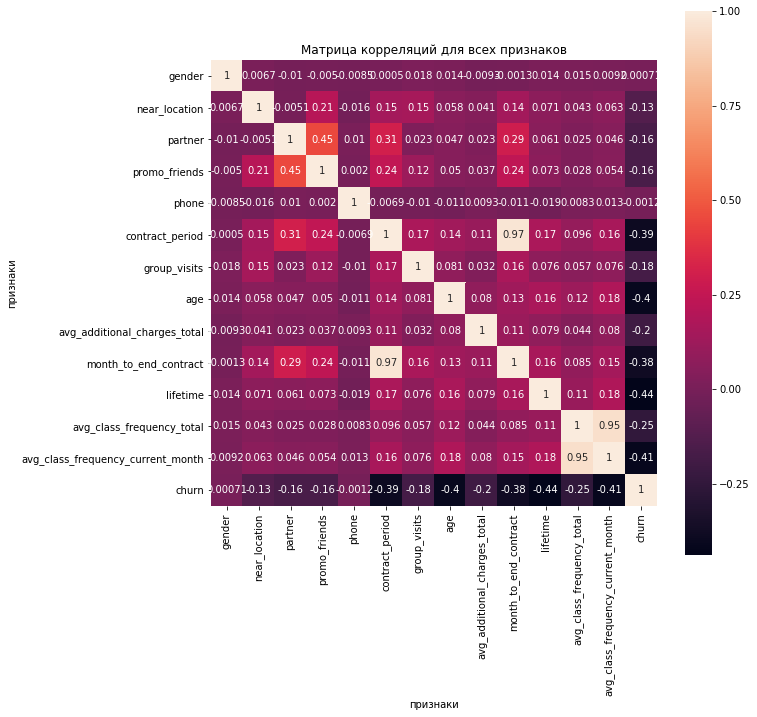

In [7]:
plt.figure(figsize = (10, 10))
ax = sns.heatmap(df.corr(), annot = True, square = True)
ax.set_xlabel('признаки')
ax.set_ylabel('признаки')
ax.set_title('Матрица корреляций для всех признаков')
plt.show()

- Согласно коэффициентам корреляции, наиболее сильная прямая связь (0.97) между признаками `contract_period` и `month_to_end_contract` (выше мы уже отмечали, что чем больше длительность абонемента, тем выше срок до его окончания).
- Также сильная прямая взаимосвязь (0.95) у признаков `avg_class_frequency_total` и `avg_class_frequency_current_month` - то есть, чем чаще в среднем клиент посещает спортзал за все время с начала действия абонемента, тем чаще он это будет делать в течение предыдущего месяца наблюдений.
- **Мультиколлинеарность** может привести к проблеме с обучением модели, так как есть риск того, что алгоритм не оценит адекватно влияние отдельного признака на целевую переменную.

<div id='id-section12'/>

### [Вывод](#id-section35)

**Исследовательский анализ данных** позволил нам прийти к таким **выводам**:

- Среднее значение для признака `gender` по всему датасету (0.51) говорит о том, что в датасете примерно одинаковое количество анкет для мужчин и женщин. Мы видим, что различий по признаку пола в двух группах также нет - и среди ушедших, и среди оставшихся клиентов примерно равное количество мужчин и женщин. Это подтверждается на гистограмме.

- Большинство клиентов (и оставшиеся, и ушедшие) проживают или работают в районе, где находится фитнес-центр (показатель для ушедших клиентов, у которых фитнес не был рядом с работой или домом, немного выше - возможно, это и явилось причиной их ухода), а также почти всегда оставляют свой контактный телефон (скорее всего, это условие обязательно для записи в фитнес-центр).

- Клиенты, которые не ушли в отток, чаще являются сотрудниками компании-партнера клуба или пришли по акции «приведи друга» - видимо, это дает им преференции, которые не позволяют отказаться от посещения фитнес-центра, такие клиенты получают больше преимуществ и, как следствие, более лояльны.

- При этом акция «приведи друга» (использование промо-кода от знакомого при оплате первого абонемента) не пользуется большой популярностью, таких клиентов меньше, чем обычных (среднее значение признака `promo_friends` = 0.30).

- Средный возраст клиента равен 29 годам. Клиенты, которые продолжают ходить в фитнес-центр, на 3 года старше тех, кто ушел в отток (с возрастом необходимость регулярно заниматься спортом и следить за физической формой повышается).

- Оставшиеся клиенты чаще оформляют абонементы на более длительные сроки (6 или 12 месяцев), чем ушедшие. Видимо, как только у клиента появляется уверенность в желании посещать именно этот фитнес-центр, сразу принимается решение о покупке долгосрочного абонемента, так как это выгодно. А чем больше длительность абонемента, тем выше срок до его окончания. А ушедшие клиенты, наоборот, не уверены в том, захотят ли они и дальше посещать именно этот фитнес-центр, поэтому они покупают "пробный" короткий абонемент. У коротких абонементов срок до окончания всегда будет маленьким.

- Время с момента первого обращения клиента в фитнес-центр в среднем равно 4 месяцам. При этом распределение признака `lifetime` показывает, что клиенты принимают решение об уходе чаще всего после 1 месяца похода в спортзал. Зато оставшиеся клиенты посещают фитнес долго, иногда даже счет идет на 2.5 года. Этот фактор связан с кардинально разной длительностью абонементов у двух групп.

- Общая частота посещений фитнес-центра в среднем составляет примерно 2 раза в неделю. Оставшиеся клиенты больше мотивированы на посещение спортзала, чем ушедшие - распределение показателей `avg_class_frequency_total` и `avg_class_frequency_current_month` говорит о том, что оставшиеся клиенты ходят на фитнес 2-3 раза в неделю, а ушедшие 1-2 раза в неделю, а в последний месяц они постепенно и вовсе переставали посещать спортзал, уходя в отток.

- При этом в обеих группах есть крупные пороговые значение возле 0 - это значит, что многие клиенты, хоть и записаны в спортзал, не посещают его совсем.

- Оставшиеся клиенты охотнее посещают групповые занятия, чем ушедшие. Возможно, это более второстепенный формат, на первом месте для клиентов все же индивидуальные занятия.

- Чем дольше клиенты посещают фитнес-центр, тем выше их дополнительные траты на другие услуги фитнес-центра: кафе, спорт-товары, косметический и массажный салон. Этим объясняется разница в показателе `avg_additional_charges_total` для оставшихся и ушедших клиентов. При этом доля мелких трат выше у ушедших клиентов (возможно, они пытались оценить весь ассортимент услуг, прежде чем принять решение об уходе).

Построение **матрицы корреляций** показало следующий результат:

- Наиболее сильная прямая связь между признаками `contract_period` и `month_to_end_contract` (чем больше длительность абонемента, тем выше срок до его окончания).

- Также сильная прямая взаимосвязь у признаков `avg_class_frequency_total` и `avg_class_frequency_current_month` - то есть, чем чаще в среднем клиент посещает спортзал за все время с начала действия абонемента, тем чаще он это будет делать в течение предыдущего месяца наблюдений.

- Мультиколлинеарность может привести к проблеме с обучением модели, так как есть риск того, что алгоритм не оценит адекватно влияние отдельного признака на целевую переменную.

<div id='id-section13'/>

## [Шаг 4. Построим модель прогнозирования оттока клиентов](#id-section36)

Построим **модель бинарной классификации клиентов**, где целевой признак — факт оттока клиента в следующем месяце.

- Для этого разделим наши данные на признаки (матрица X) и целевую переменную (y). На предыдущем этапе мы выяснили, что есть признаки, коэффициент корреляции которых слишком высокий - это может помешать алгоритму адекватно оценить влияние отдельного признака на целевую переменную. Поэтому при формировании матрицы X мы отбросим признаки `month_to_end_contract` и `avg_class_frequency_current_month`.

- Разделим выборку на обучающую и валидационную в отношении 80% к 20% функцией `train_test_split()`, так как мы доверяем именно этой общепринятой пропорции для деления.

- Также проведем процедуру приведения признаков к стандартизированному виду (чтобы масштабировать исходный разброс значений к 1) с помощью `StandardScaler()`.

In [8]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns = ['churn', 'month_to_end_contract', 'avg_class_frequency_current_month'])
y = df['churn']

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) 

# применим стандартизацию к матрице признаков для валидационной выборки
X_test_st = scaler.transform(X_test)


Обучим модель на train-выборке двумя способами:
- логистической регрессией,
- случайным лесом.

Создадим список моделей для алгоритмов:
- `LogisticRegression()`,
- `RandomForestClassifier()`.

Далее напишем функцию, которая будет обучать каждую модель на train-выборке, делать прогноз на валидационных данных и выводить метрики `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, а также `ROC_AUC`.

Запустим циклом вывод метрик для всех алгоритмов и посморим, какой алгоритм показал наилучшие метрики. Для понимания того, на какие именно метрики надо обратить наиболее пристальное внимание, выведем на экран количество наблюдений по каждому классу. 

In [9]:
# задаем список моделей
models = [LogisticRegression(random_state = 0), RandomForestClassifier(n_estimators = 100, random_state = 0)]


# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train_st, y_train, X_test_st, y_test):
    model = m
    model.fit(X_train_st, y_train)
    y_pred = model.predict(X_test_st)
    y_proba = model.predict_proba(X_test_st)[:,1]
    display('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}, ROC_AUC: {:.2f}'\
            .format(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), \
                    recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_proba)))

# цикл, который выводит метрики по списку моделей
for i in models:
    display('Модель: ', i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)


# выведем количество наблюдений для двух классов 
display('Баланс классов: ', df['churn'].value_counts())

'Модель: '

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'Accuracy: 0.90, Precision: 0.79, Recall: 0.81, F1: 0.80, ROC_AUC: 0.95'

'Модель: '

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

'Accuracy: 0.89, Precision: 0.79, Recall: 0.76, F1: 0.77, ROC_AUC: 0.94'

'Баланс классов: '

0    2939
1    1061
Name: churn, dtype: int64

Мы видим, что в датасете **несбалансированные классы** - клиентов, которые не ушли в отток (`churn` = 0), почти в 3 раза больше, чем тех, кто ушел.

- Это значит, что метрика `Accuracy` (показывает долю верно угаданных ответов из всех прогнозов) не может быть нами рассмотрена как показатель того, какая модель лучше, так как эта метрика работает только при условии баланса классов — когда объектов каждого класса примерно поровну, 50% : 50%.

- При условии несбалансированных классов мы можем сравнивать метрики `Precision` (доля правильных ответов только среди целевого класса - 1) и `Recall` (показывает, сколько реальных объектов класса 1 мы смогли обнаружить с помощью модели). Точность (`Precision`) у двух моделей одинакова, а по полноте (`Recall`) выигрывает `LogisticRegression()`.

- `F1-метрика` учитывает баланс между метриками `Precision` и `Recall` - по ней также лидирует `LogisticRegression()`.

- Для оценки качества модели классификации мы применили метрику `ROC_AUC` (показывает, насколько хорошо будут выделяться реальные классы объектов, если отсортировать объекты по вероятности, которую спрогнозировала модель). Эта метрика тоже хорошо подходит даже для несбалансированных классов. Согласно данной метрике, обе модели ведут себя адекватно, неплохо сортируют объекты, не называют класс наугад, но с небольшим отрывом побеждает `LogisticRegression()`.

- Мы можем сделать вывод, что **модель `LogisticRegression()` показала себя лучше на основании метрик**.

<div id='id-section14'/>

### [Интерпретируем модель](#id-section37)

Заново обучим лучшую модель (мы поняли, что это `LogisticRegression()`) на train-выборке и сделаем прогноз на валидационных данных.

Интерпретируем модель: создадим датафрейм с важностью каждого признака и выведем его в порядке убывания важности признаков. Так мы поймем, какие признаки наиболее важны для модели.

In [10]:
# обучим финальную модель
final_model = LogisticRegression(random_state = 0)
final_model.fit(X_train_st, y_train)
y_pred = final_model.predict(X_test_st)

     
# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
features = pd.DataFrame()
features['feature'] = X.columns
features['coeff'] = final_model.coef_.ravel()

display(features.sort_values(by = 'coeff', ascending = False))


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,feature,coeff
0,gender,0.048809
2,partner,-0.053140
1,near_location,-0.087137
4,phone,-0.116857
3,promo_friends,-0.214108
6,group_visits,-0.354118
8,avg_additional_charges_total,-0.559044
10,avg_class_frequency_total,-0.719486
7,age,-1.080316
5,contract_period,-1.295321


- Согласно присвоенным коэффициентам, наиболее важным признаком модель посчитала `gender`. 
- Вместе с тем, необходимо отметить, что коэффициенты важности, которые присваивает модель `LogisticRegression()`, сложны для прямой интерпретации и требуют дополнительных исследований. 

<div id='id-section15'/>

### [Вывод](#id-section38)

Построение модели бинарной классификации клиентов при условии **несбалансированности классов** (клиентов, которые не ушли в отток, почти в 3 раза больше, чем тех, кто ушел), показало следующие результаты.

- При сравнении метрики `Precision` (доля правильных ответов только среди целевого класса - 1) и `Recall` (показывает, сколько реальных объектов класса 1 мы смогли обнаружить с помощью модели) оказалось, что точность (`Precision`) у моделей логистической регрессии и случайного леса одинакова, а по полноте (`Recall`) выигрывает `LogisticRegression()`.

- `F1-метрика` учитывает баланс между метриками `Precision` и `Recall` - по ней также лидирует `LogisticRegression()`.

- Для оценки качества модели классификации мы применили метрику `ROC_AUC` (показывает, насколько хорошо будут выделяться реальные классы объектов, если отсортировать объекты по вероятности, которую спрогнозировала модель). Эта метрика тоже хорошо подходит даже для несбалансированных классов. Согласно данной метрике, обе модели ведут себя адекватно, неплохо сортируют объекты, не называют класс наугад, но с небольшим отрывом побеждает `LogisticRegression()`.

- Мы можем сделать вывод, что **модель `LogisticRegression()` показала себя лучше** на основании метрик.

Мы заново обучили лучшую модель (`LogisticRegression()`) на train-выборке и сделали прогноз на валидационных данных. При интерпретации модели мы увидели, что наиболее важным признаком модель посчитала `gender`.
- Вместе с тем, необходимо отметить, что коэффициенты важности, которые присваивает модель `LogisticRegression()`, сложны для прямой интерпретации и требуют дополнительных исследований.

<div id='id-section16'/>

## [Шаг 5. Сделаем кластеризацию клиентов](#id-section39)


<div id='id-section17'/>

### [Построим матрицу расстояний и нарисуем дендрограмму](#id-section40)

Перед работой с алгоритмом кластеризации `linkage()` выполним стандартизацию признаков (теперь мы используем все признаки датасета, кроме целевой переменной `churn`) и передадим получившуюся стандартизированную таблицу в качестве параметра функции `linkage()` с параметром `method = 'ward'`.

Таким образом, в переменной `linked` будет сохранена таблица связок между объектами (матрица расстояний), которую мы визуализируем как дендрограмму методом `dendrogram()`.

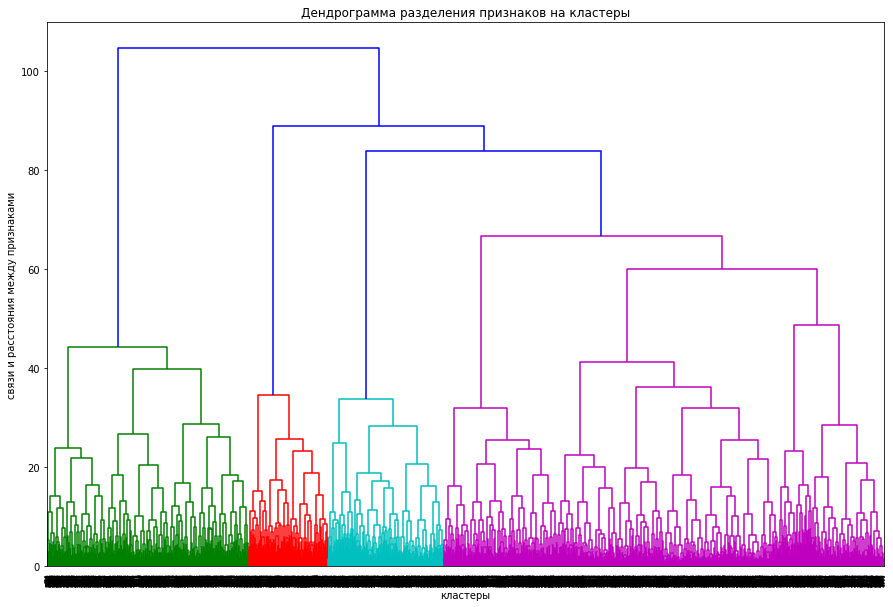

In [11]:
# стандартируем данные перед работой с алгоритмом
sc = StandardScaler()
X_sc = sc.fit_transform(df.drop(columns = ['churn']))

linked = linkage(X_sc, method = 'ward')

# рисуем дендрограмму
plt.figure(figsize = (15, 10))  
dendrogram(linked, orientation = 'top')
plt.title('Дендрограмма разделения признаков на кластеры') 
plt.xlabel('кластеры')
plt.ylabel('связи и расстояния между признаками')
plt.show() 

- На основании дендрограммы мы можем считать, что **оптимальным числом кластеров является 4.**

<div id='id-section18'/>

### [Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов](#id-section41)

Алгоритм `K-Means` чувствителен к заданному числу кластеров, и по условиям исследования мы должны **принять за число кластеров - 5**. Передадим это значение алгоритму. 

В переменной `labels` сохраним индексы предложенных алгоритмом групп (объекты, которым модель присвоила один и тот же индекс, относятся к одному кластеру).

In [12]:
# задаем модель K-Means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state = 0) 

# прогнозируем кластеры для наблюдений (применяем алгоритм к данным и формируем вектор кластеров)
labels = km.fit_predict(X_sc) 

Проверим, **насколько качественно прошла кластеризация**. Для этого посчитаем значение метрики `silhouette_score` (показывает, насколько объект своего кластера похож на свой кластер больше, чем на чужой, то есть характеризует компактность (кучность) кластера и отделимость кластера от других).

На вход передадим стандартизованную матрицу признаков и метки, которые спрогнозировал алгоритм кластеризации, в виде списка.

In [13]:
display('Silhouette score для 5 кластеров: {:.2f}'.format(silhouette_score(X_sc, labels)))


'Silhouette score для 5 кластеров: 0.14'

➕ Для проверки попробуем также вывести метрику `silhouette_score` для 4 кластеров (согласно результату дендрограммы). 

In [14]:
# задаем модель K-Means с числом кластеров 4
km1 = KMeans(n_clusters = 4, random_state = 0) 

# прогнозируем кластеры для наблюдений (применяем алгоритм к данным и формируем вектор кластеров)
labels1 = km1.fit_predict(X_sc) 

display('Silhouette score для 4 кластеров: {:.2f}'.format(silhouette_score(X_sc, labels1)))


'Silhouette score для 4 кластеров: 0.13'

Значение метрики силуэта в обоих случаях оказалось **не очень высоким.** 

- При этом надо отметить, что алгоритм K-Means основан на предположении, что число кластеров (групп) заранее известно. Это довольно сильное допущение, и часто выбор оптимального количества кластеров заслуживает решения отдельных задач.

- + Плюс, согласно теореме невозможности Клейнберга, оптимального алгоритма кластеризации не существует. Это значит, что в силу отсутствия разметки, нет единственно верного способа оценить результат работы алгоритма (все подходы к определению того, насколько хорошо разделили объекты, основаны на привлечении экспертов или эвристических оценках). 

- Будем считать, что **вопрос разбиения клиентов именно на 4 или 5 кластеров требует дополнительной проработки**.

<div id='id-section19'/>

### [Посмотрим на средние значения признаков для кластеров](#id-section42)

В датасете `df` создадим новый столбец `cluster`, куда сохраним метки кластеризации `labels`. 

Для каждого кластера выведем статистику по средним значениям признаков методом `groupby()`.

In [15]:
# новый столбец
df['cluster'] = labels

# выводим статистику по средним значениям признаков по кластеру
display(df.groupby('cluster').mean().transpose())


cluster,0,1,2,3,4
gender,0.502473,0.522078,0.495050,0.485737,0.560335
near_location,0.959446,0.862338,0.000000,1.000000,0.976105
partner,0.783383,0.470130,0.463366,0.350238,0.356033
promo_friends,0.574679,0.306494,0.079208,0.240095,0.229391
phone,1.000000,0.000000,1.000000,1.000000,0.998805
contract_period,10.884273,4.787013,2.352475,1.948494,2.665472
group_visits,0.543027,0.425974,0.215842,0.341521,0.473118
age,29.980218,29.301299,28.477228,28.167987,30.127838
avg_additional_charges_total,160.706969,143.957664,135.457501,131.622204,161.724258
month_to_end_contract,9.950544,4.475325,2.198020,1.856577,2.455197


**Кластер 0 отличается от других следующими признаками:**
- практически все клиенты из кластера живут или работают в районе, где находится фитнес-центр (выше показатели только у кластера 4),
- примерно половина клиентов являются сотрудниками компании-партнера клуба,
- никто из клиентов не оставил свой телефон.

**Отличительные черты кластера 1:**
- нет клиентов, являющихся сотрудниками компании-партнера клуба,
- практически нет клиентов, пришедших по акции «приведи друга»,
- у клиентов самая маленькая средняя длительность текущего действующего абонемента и самый небольшой срок до окончания текущего действующего абонемента (почти 2 месяца), 
- самый небольшой средний возраст клиентов (28 лет),
- клиенты посещают фитнес-центр меньше всего времени - 2 месяца,
- самая маленькая средняя частота посещений в неделю всего и за последний месяц наблюдений - 1 раз в неделю.

**Отличительные черты кластера 2:**
- самый высокий средний возраст клиентов (30 лет),
- у клиентов самая большая средняя суммарная выручка от других услуг фитнес-центра,
- клиенты посещают фитнес-центр почти 5 месяцев (дольше всех),
- самая большая средняя частота посещений в неделю всего и за последний месяц наблюдений - 3 раза в неделю.

**Отличительные черты кластера 3:**
- самое маленькое количество клиентов, проживающих или работающих в районе, где находится фитнес-центр,
- все клиенты являются сотрудниками компании-партнера клуба,
- меньше всего клиентов посещают групповые занятия (в других кластерах больше),
- самый небольшой средний возраст клиентов (28 лет) наряду с кластером 1,
- у клиентов самая низкая средняя суммарная выручка от других услуг фитнес-центра,
- клиенты посещают фитнес-центр почти 3 месяца,
- самая маленькая средняя частота посещений в неделю всего и за последний месяц наблюдений - 1 раз в неделю (данный показатель чуть ниже только у кластера 1).

**Отличительные черты кластера 4:**
- самое большое количество клиентов живут или работают в районе, где находится фитнес-центр,
- большинство клиентов являются сотрудниками компании-партнера клуба (последний показатель выше только у кластера 3),
- почти половина клиентов пришли по акции «приведи друга»,
- у клиентов самая долгая средняя длительность текущего действующего абонемента (более 11 месяцев) и самый большой срок до окончания текущего действующего абонемента (10 месяцев),
- почти половина клиентов посещают групповые занятия (в других кластерах меньше),
- у клиентов самая большая средняя суммарная выручка от других услуг фитнес-центра (наряду с кластером 2).

<div id='id-section20'/>

### [Построим распределения признаков для кластеров](#id-section43)

Посмотрим, как распределен каждый признак в разных кластерах. Графики будут располагаться рядом друг с другом. Для такого оформления напишем две функции:
- первая функция будет строить гистограмму с подписями в зависимости от признака и кластера,
- вторая функция методом `subplots()` располагает гистограммы по каждому признаку рядом.

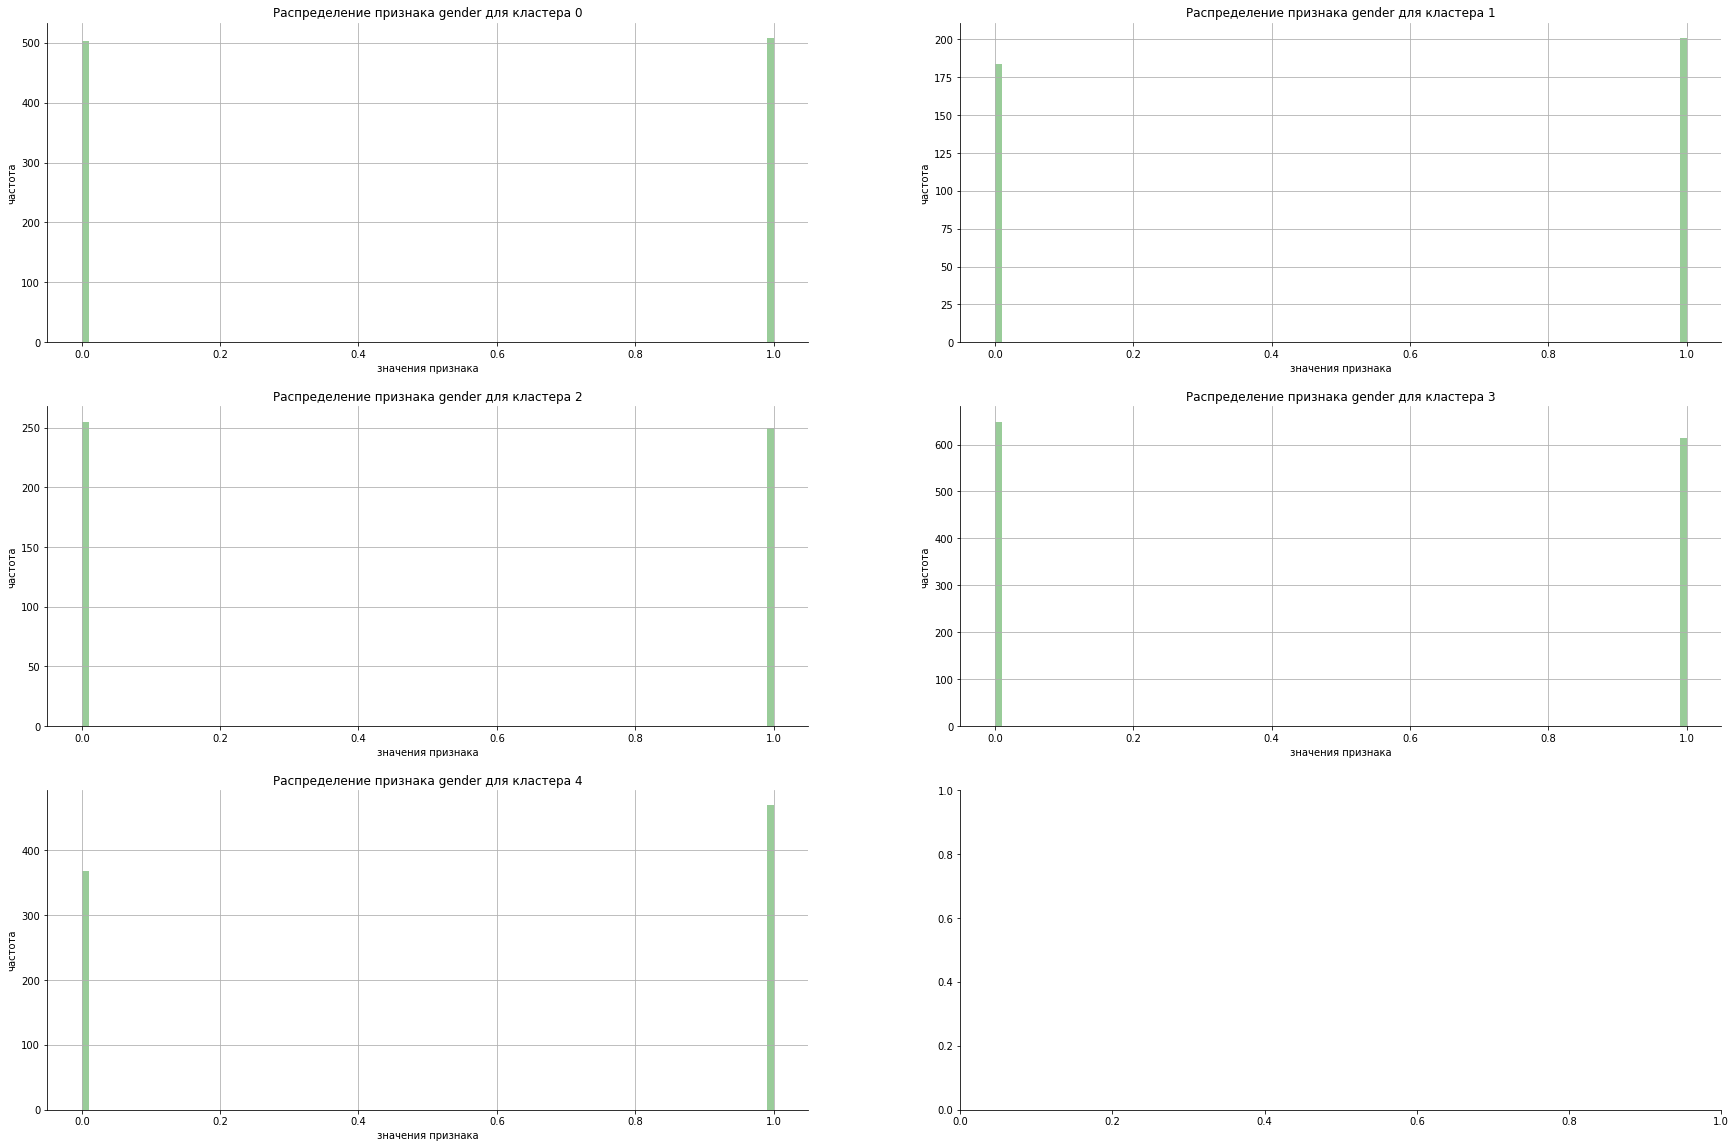

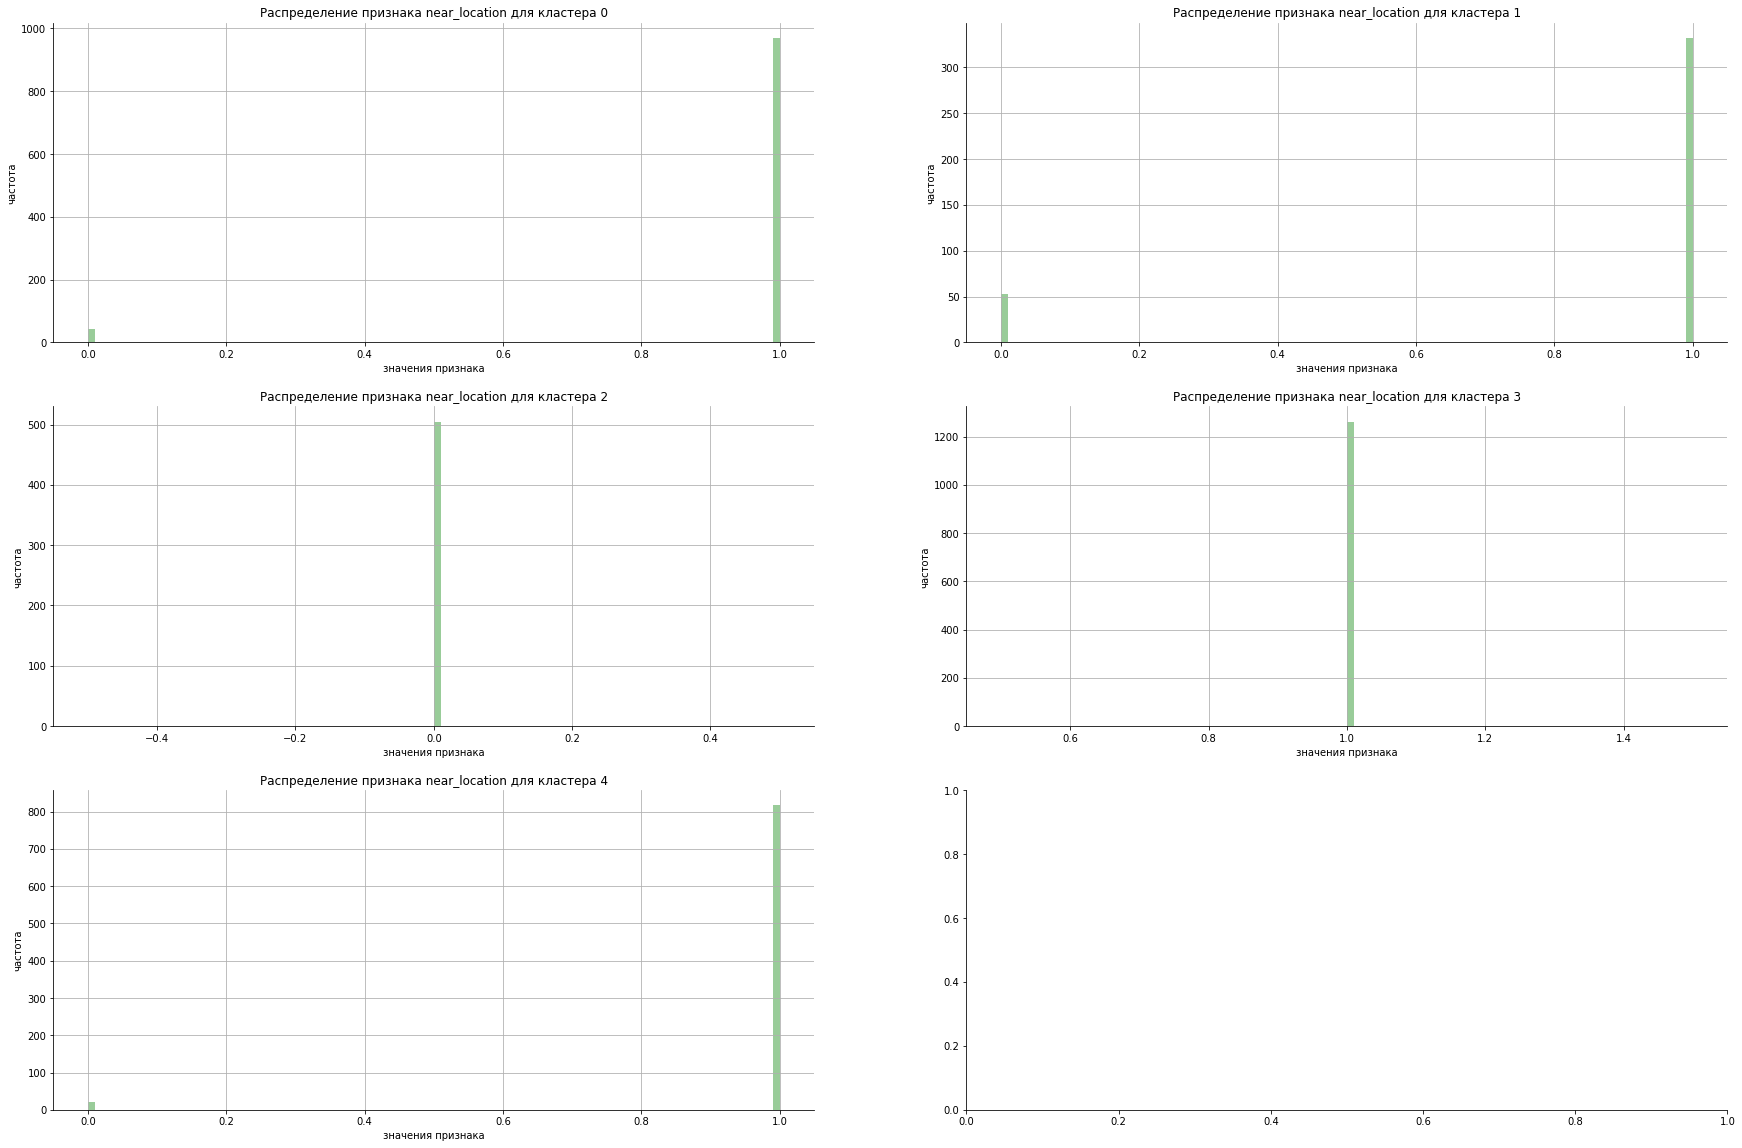

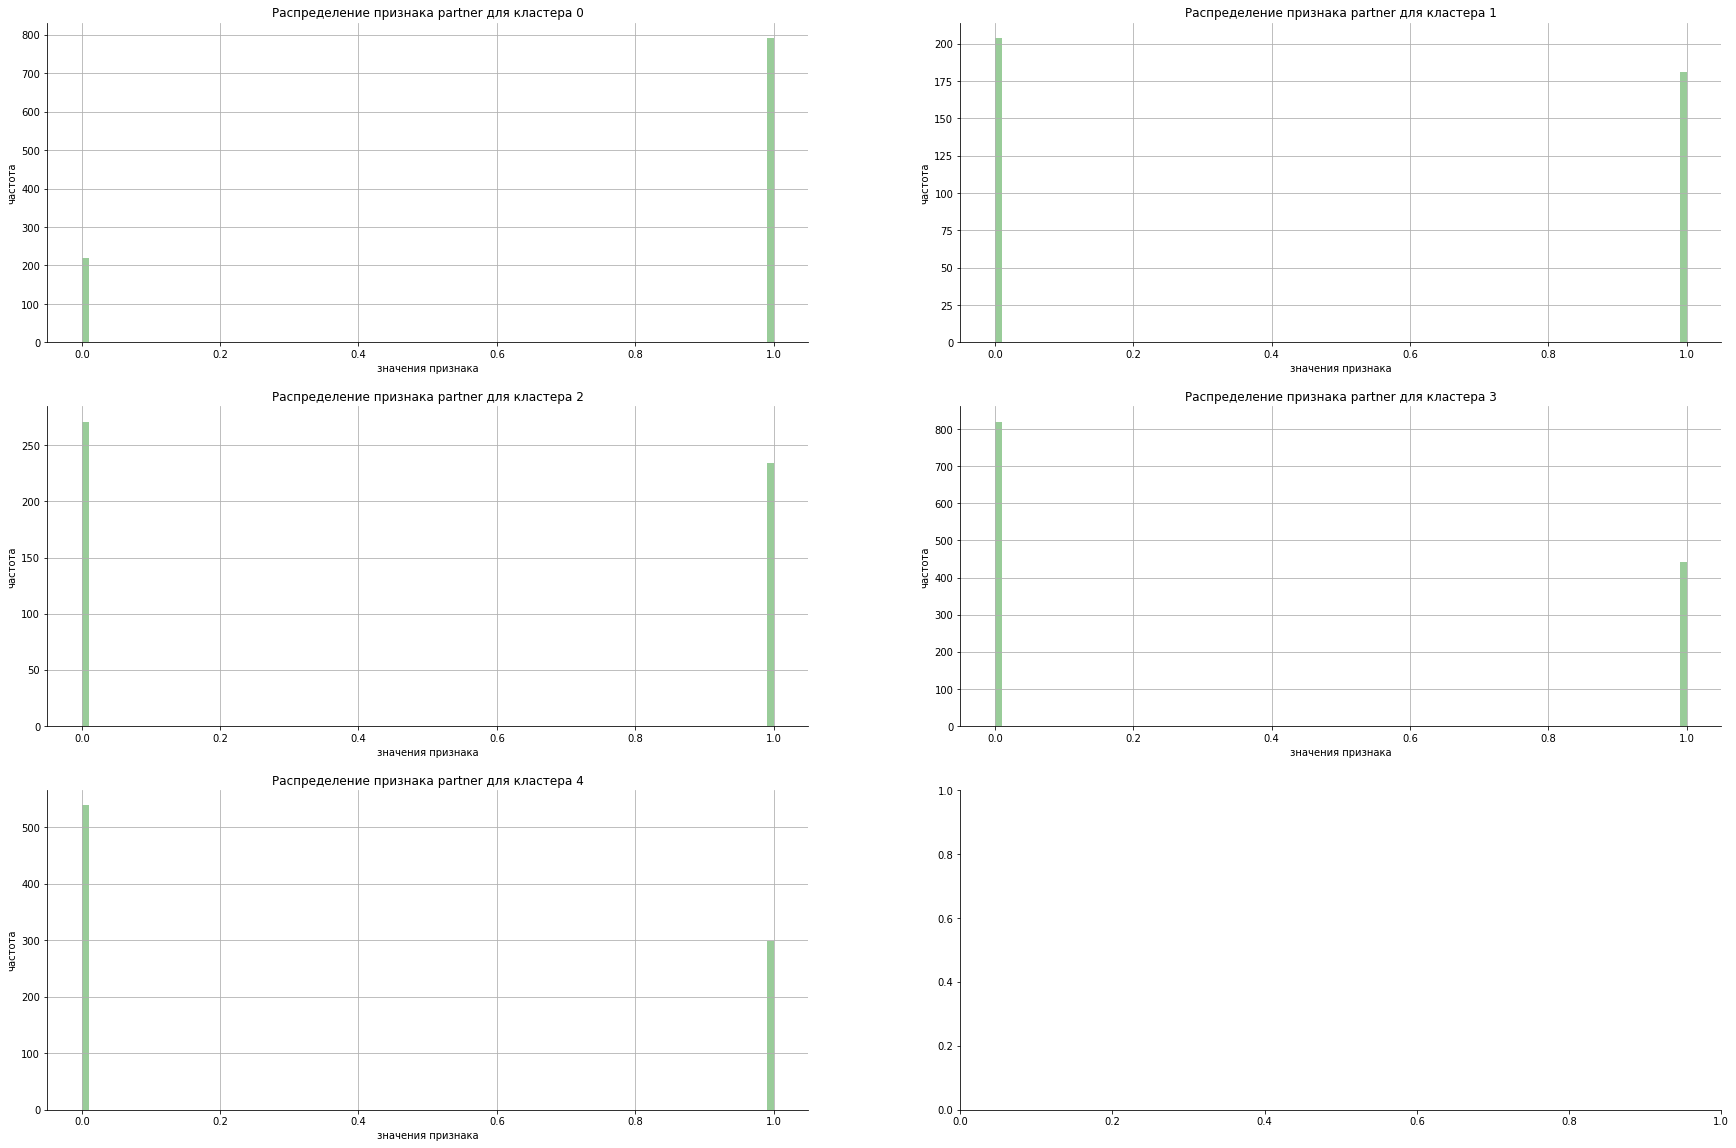

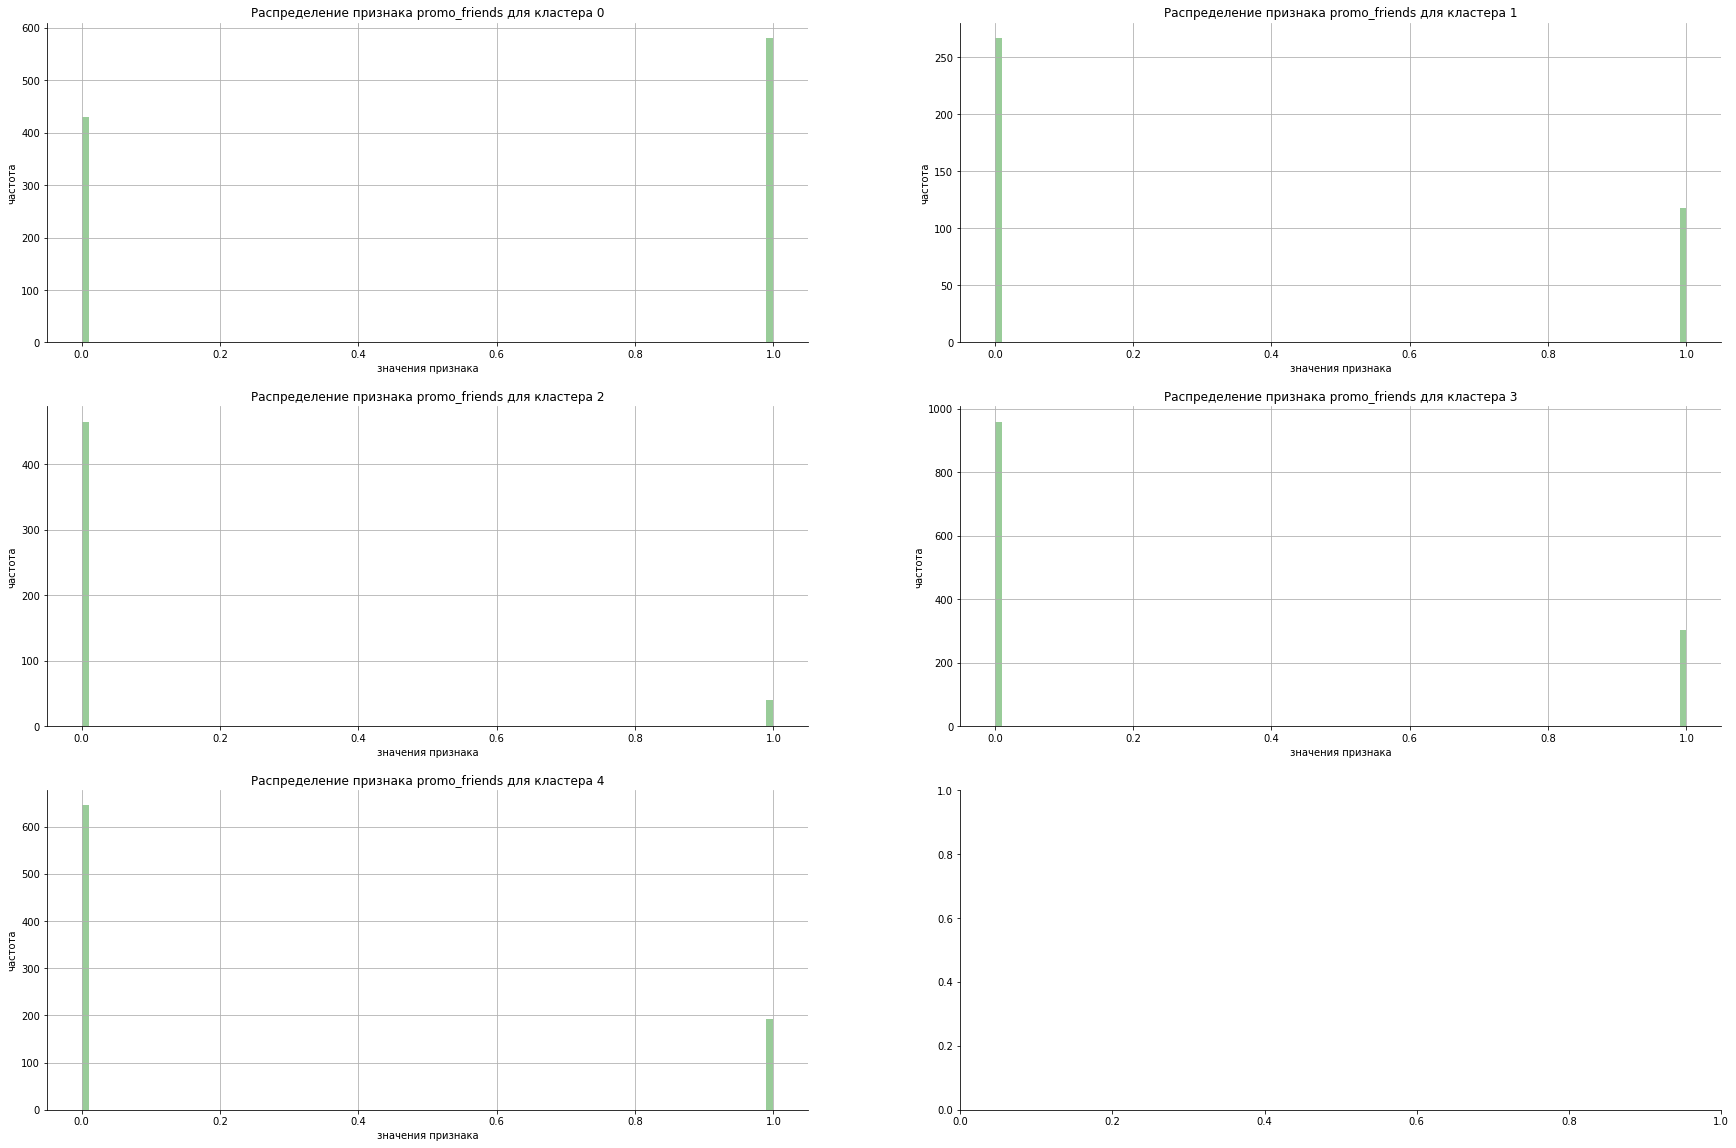

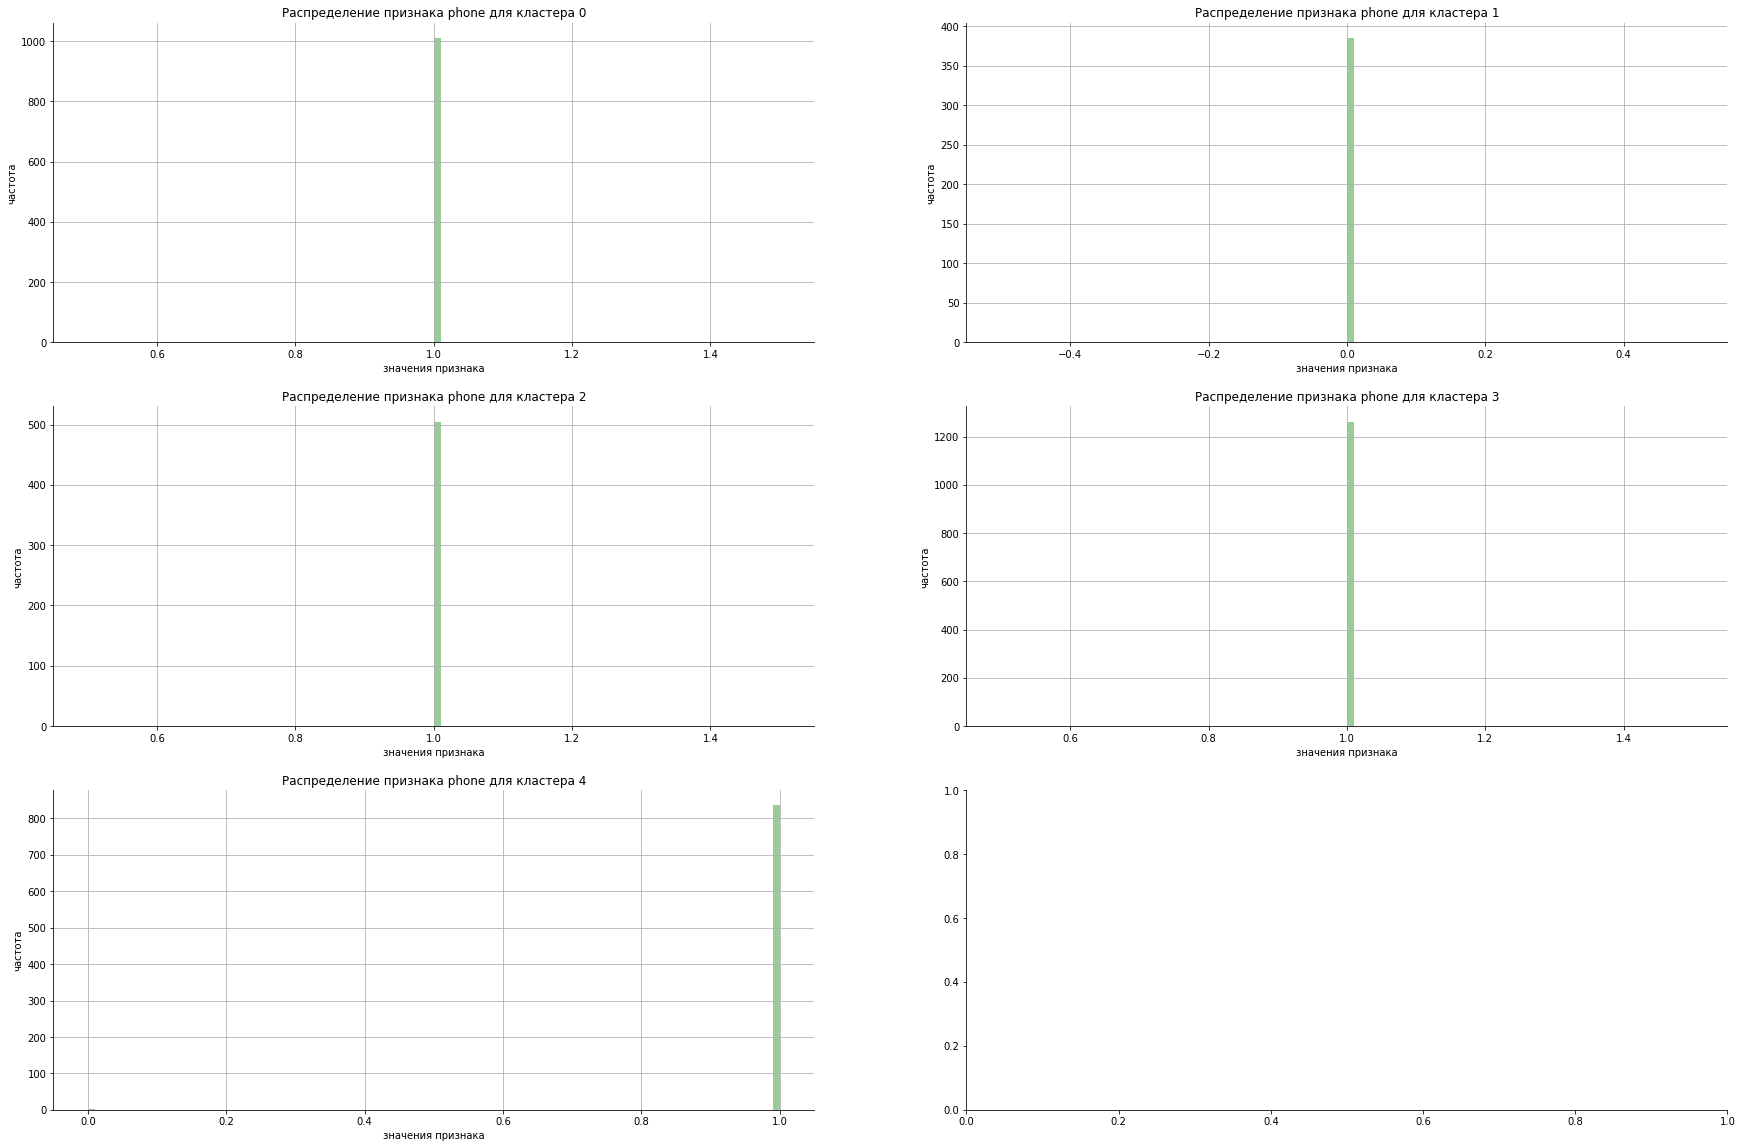

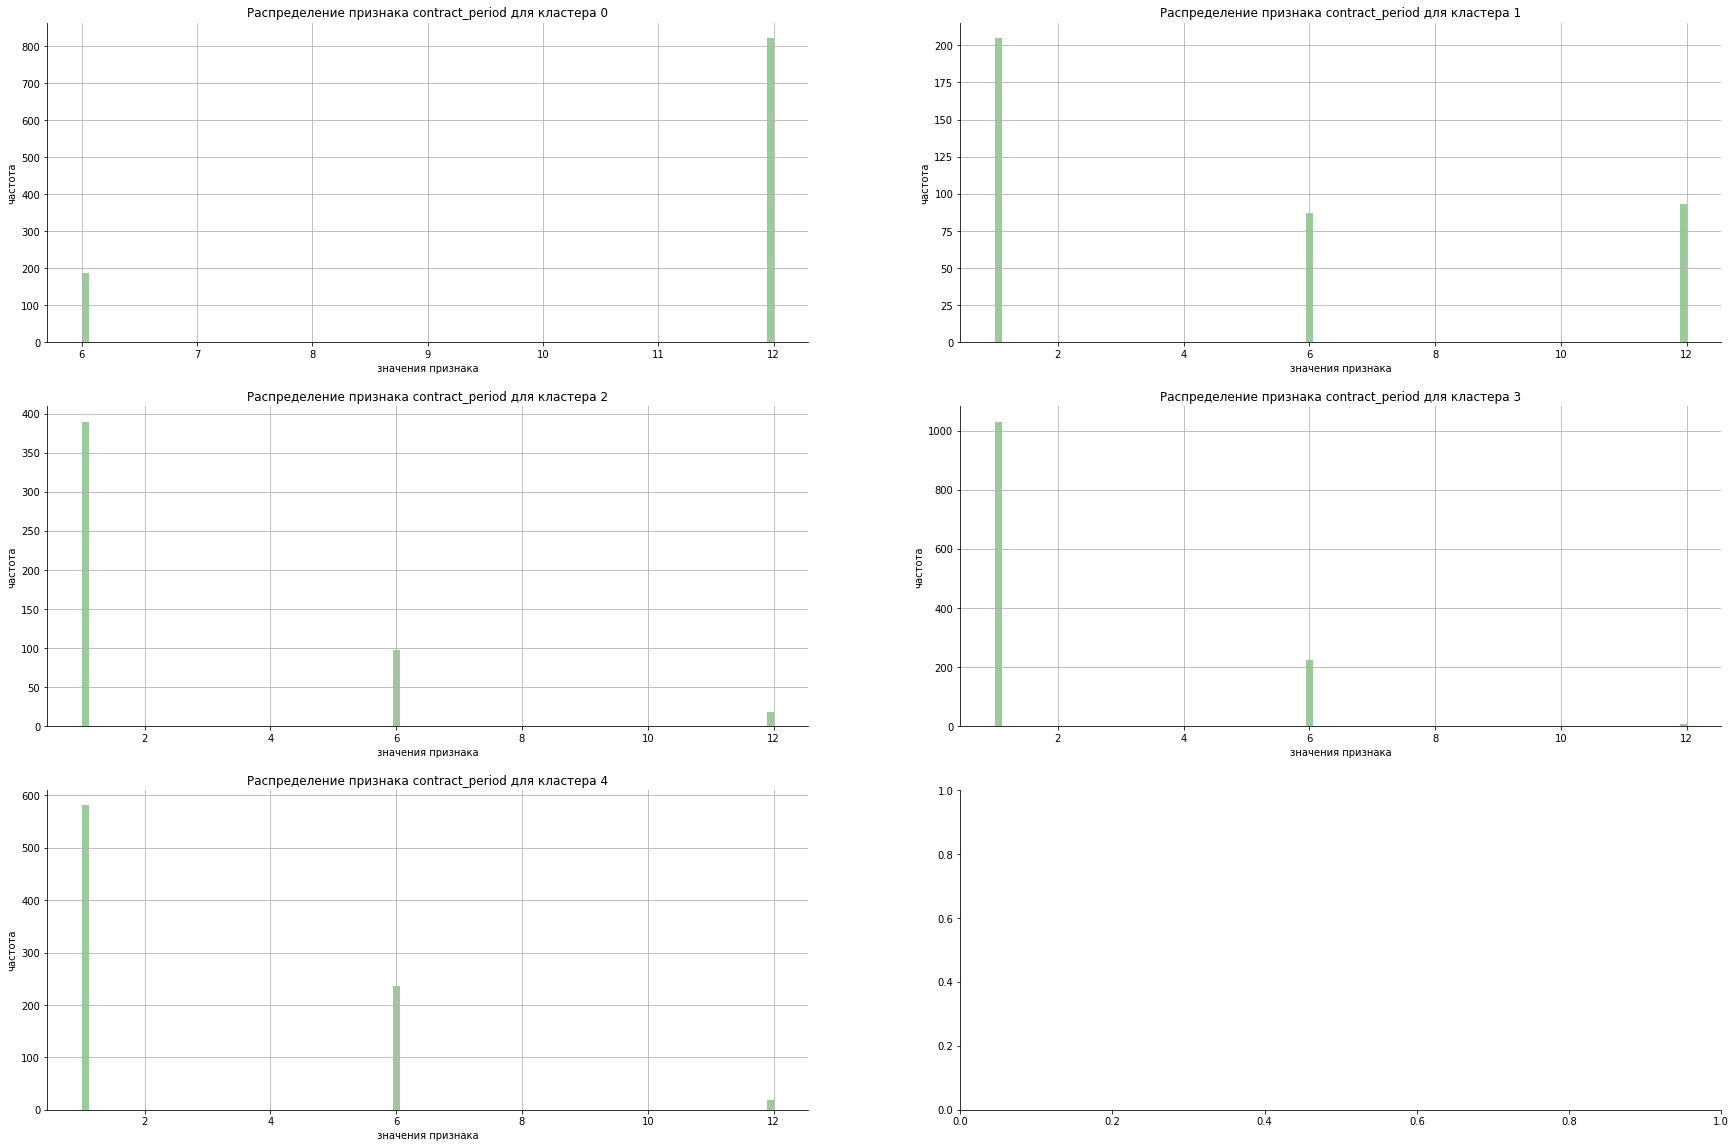

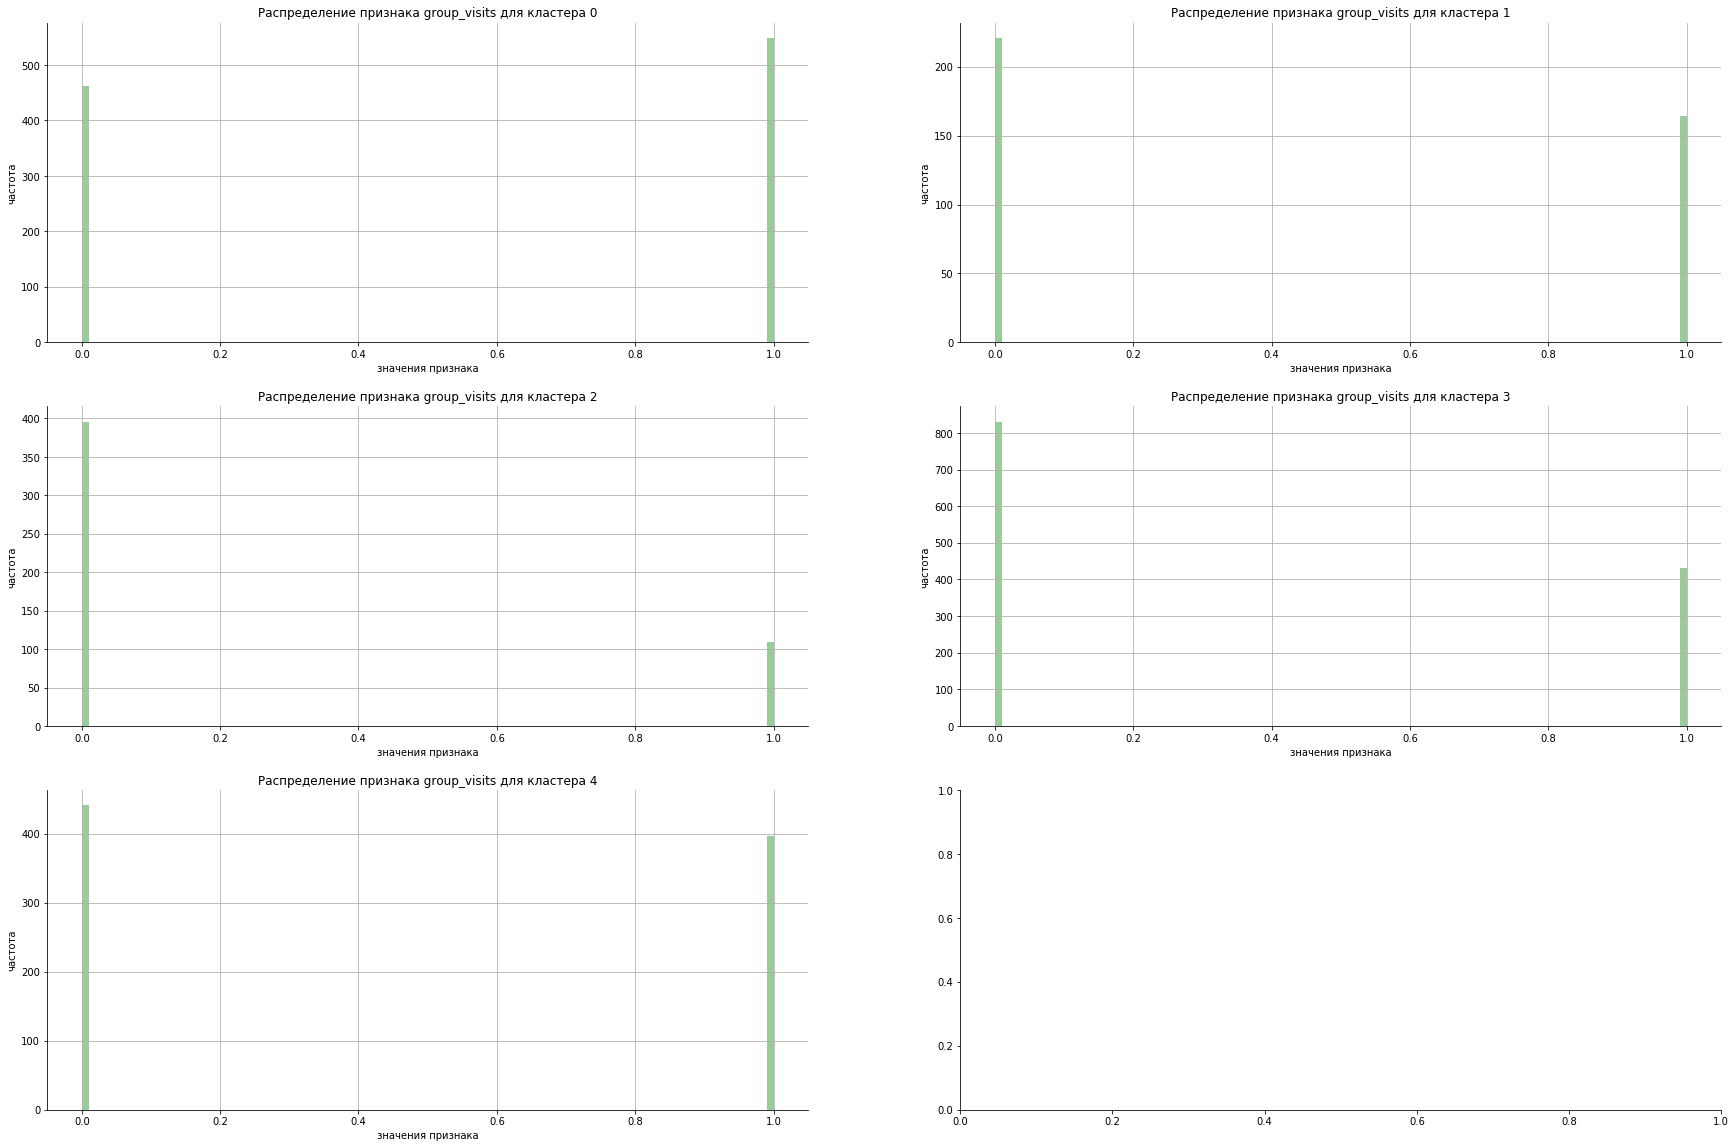

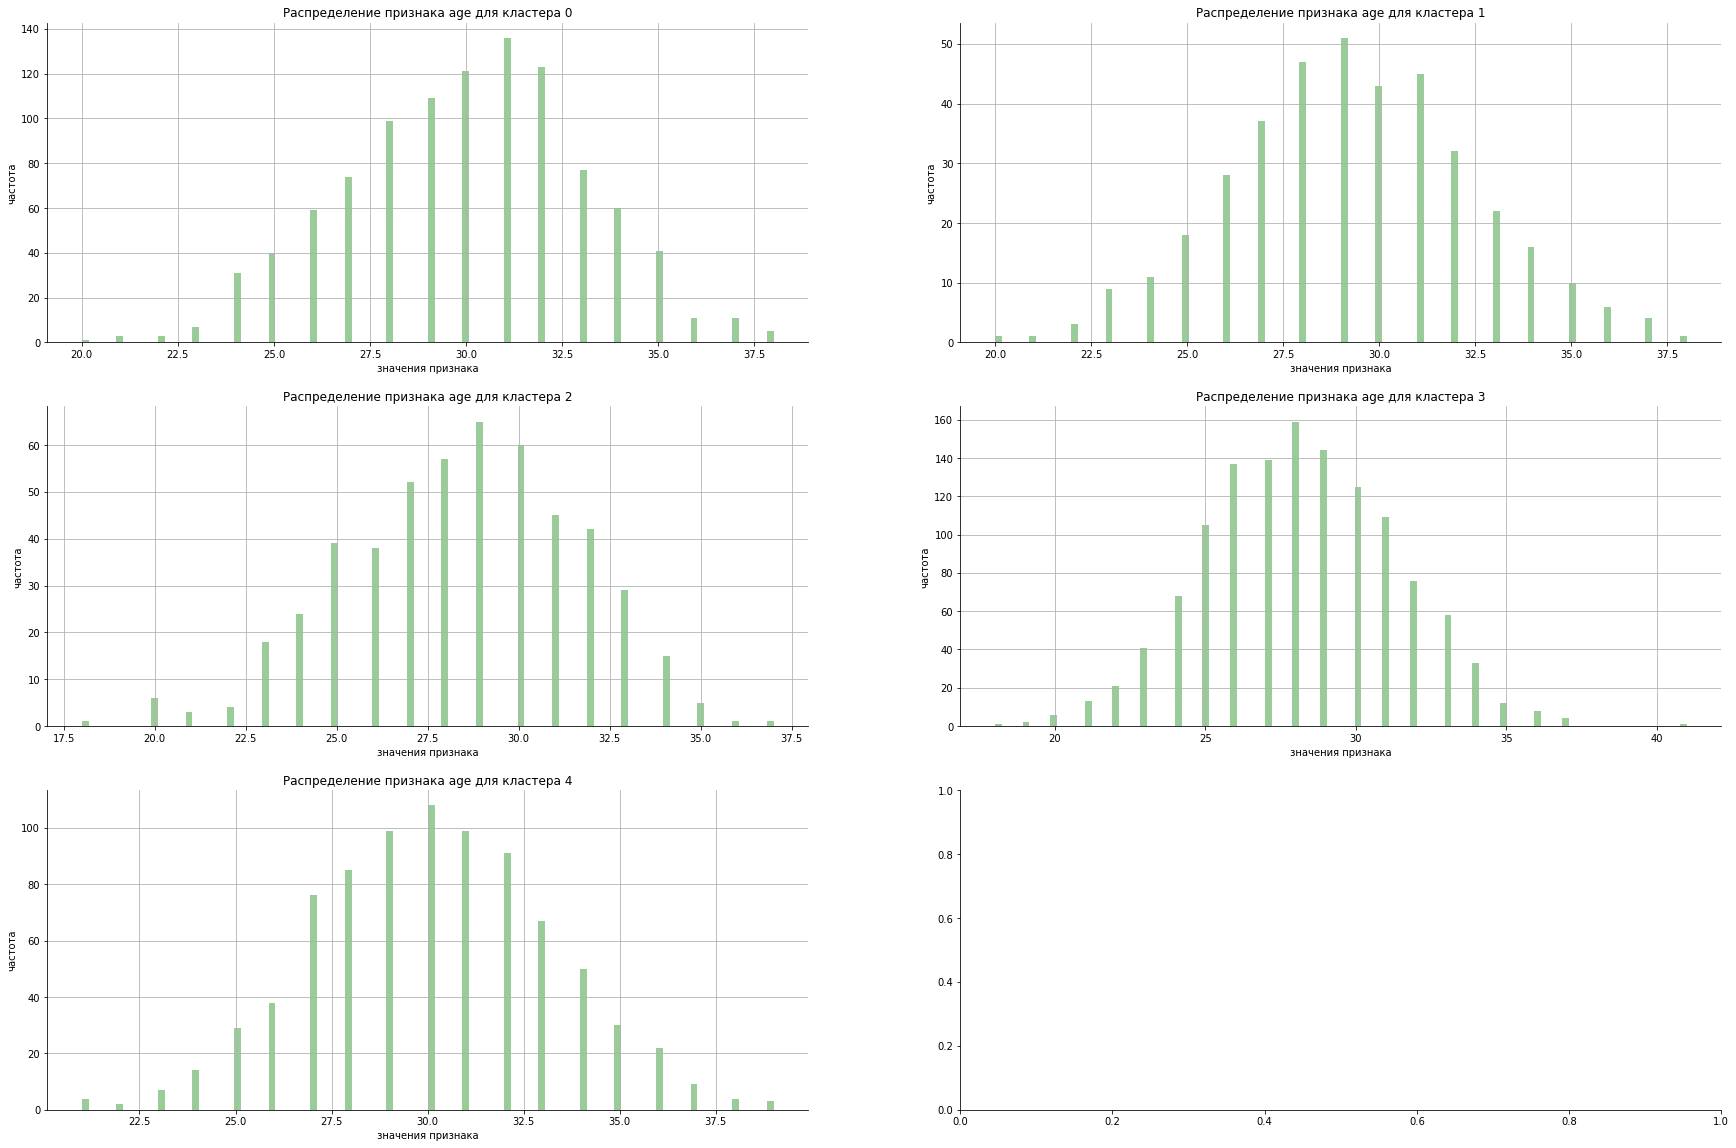

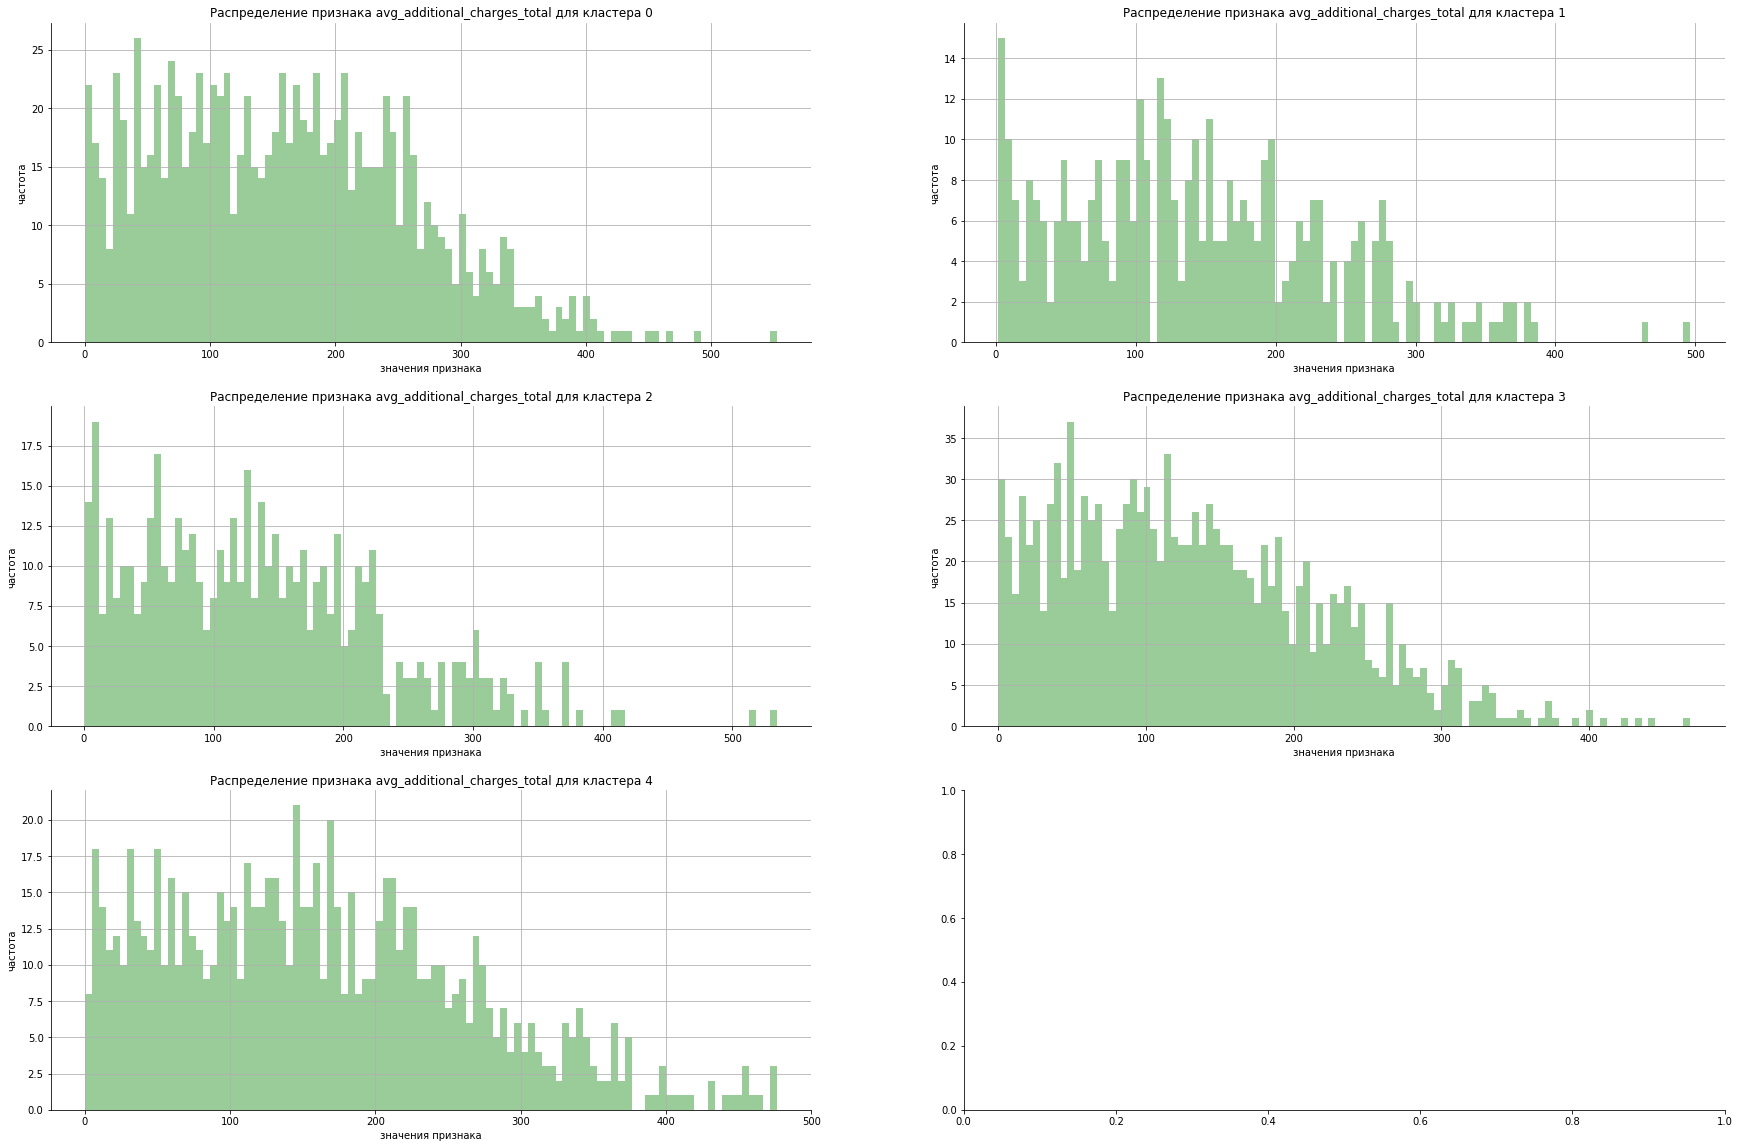

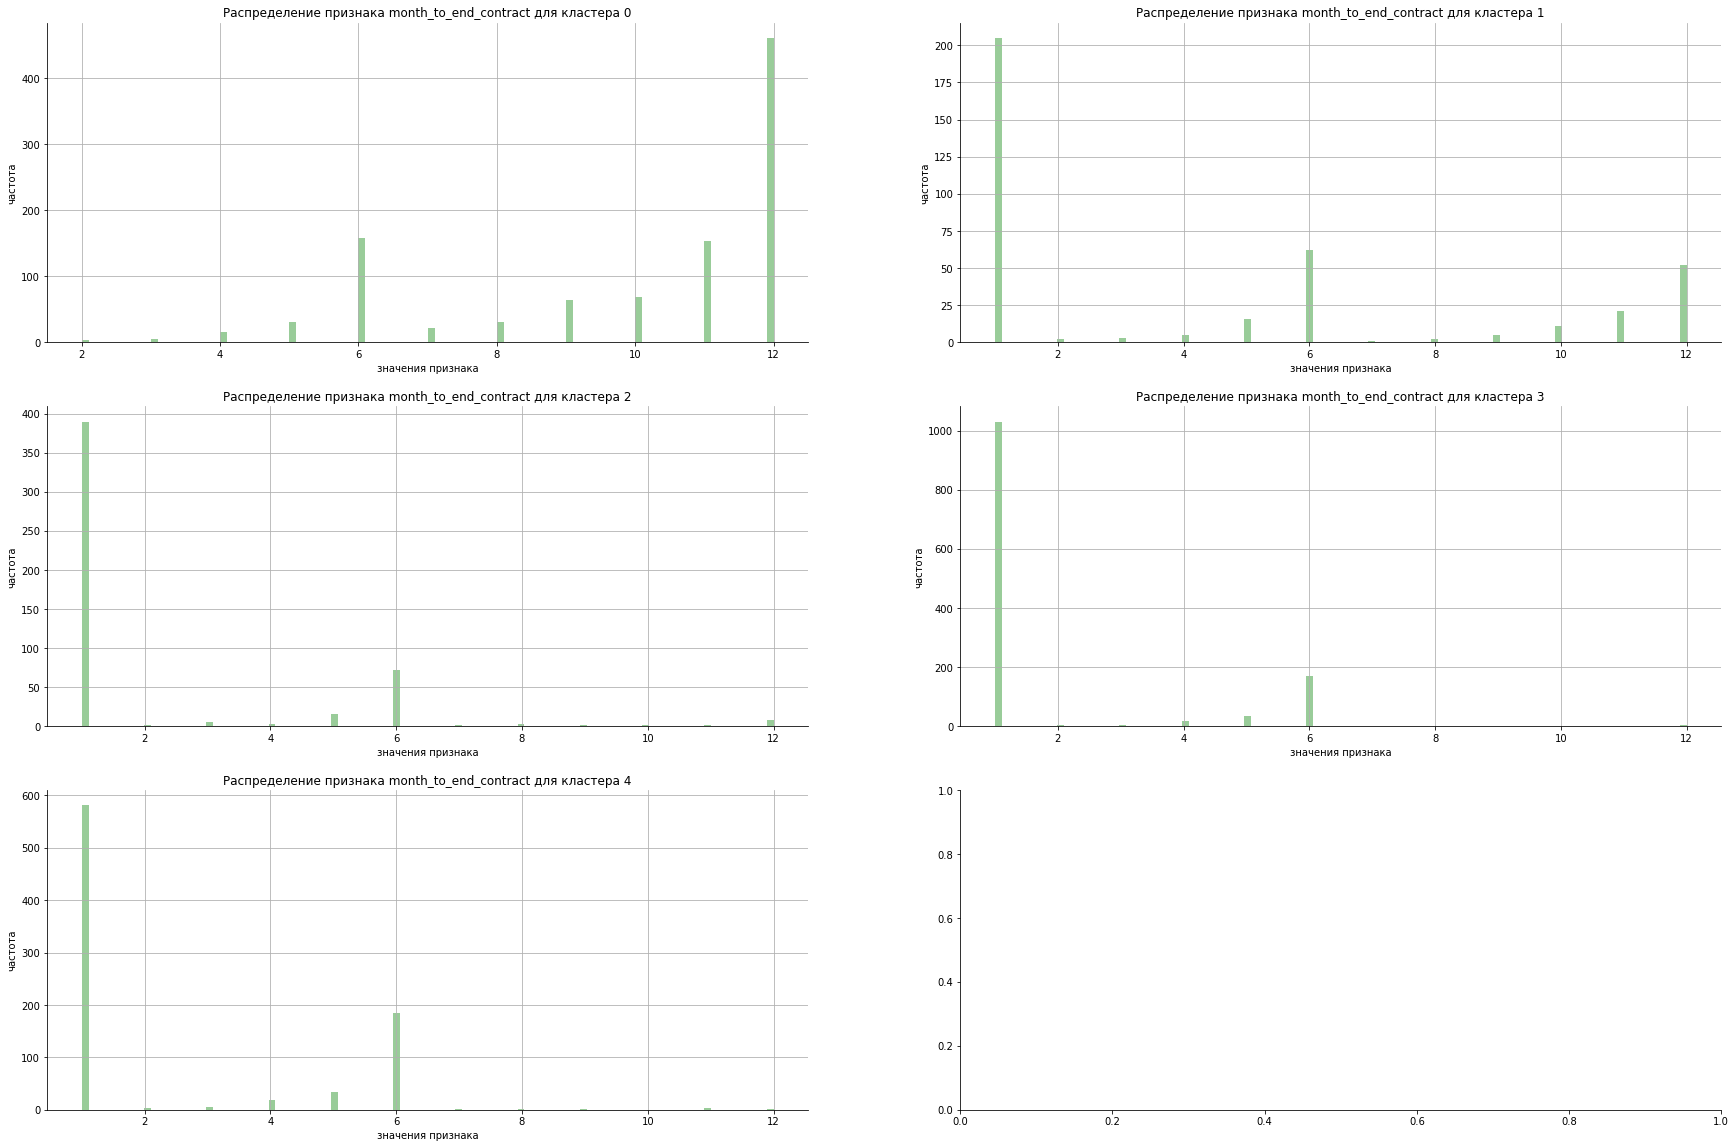

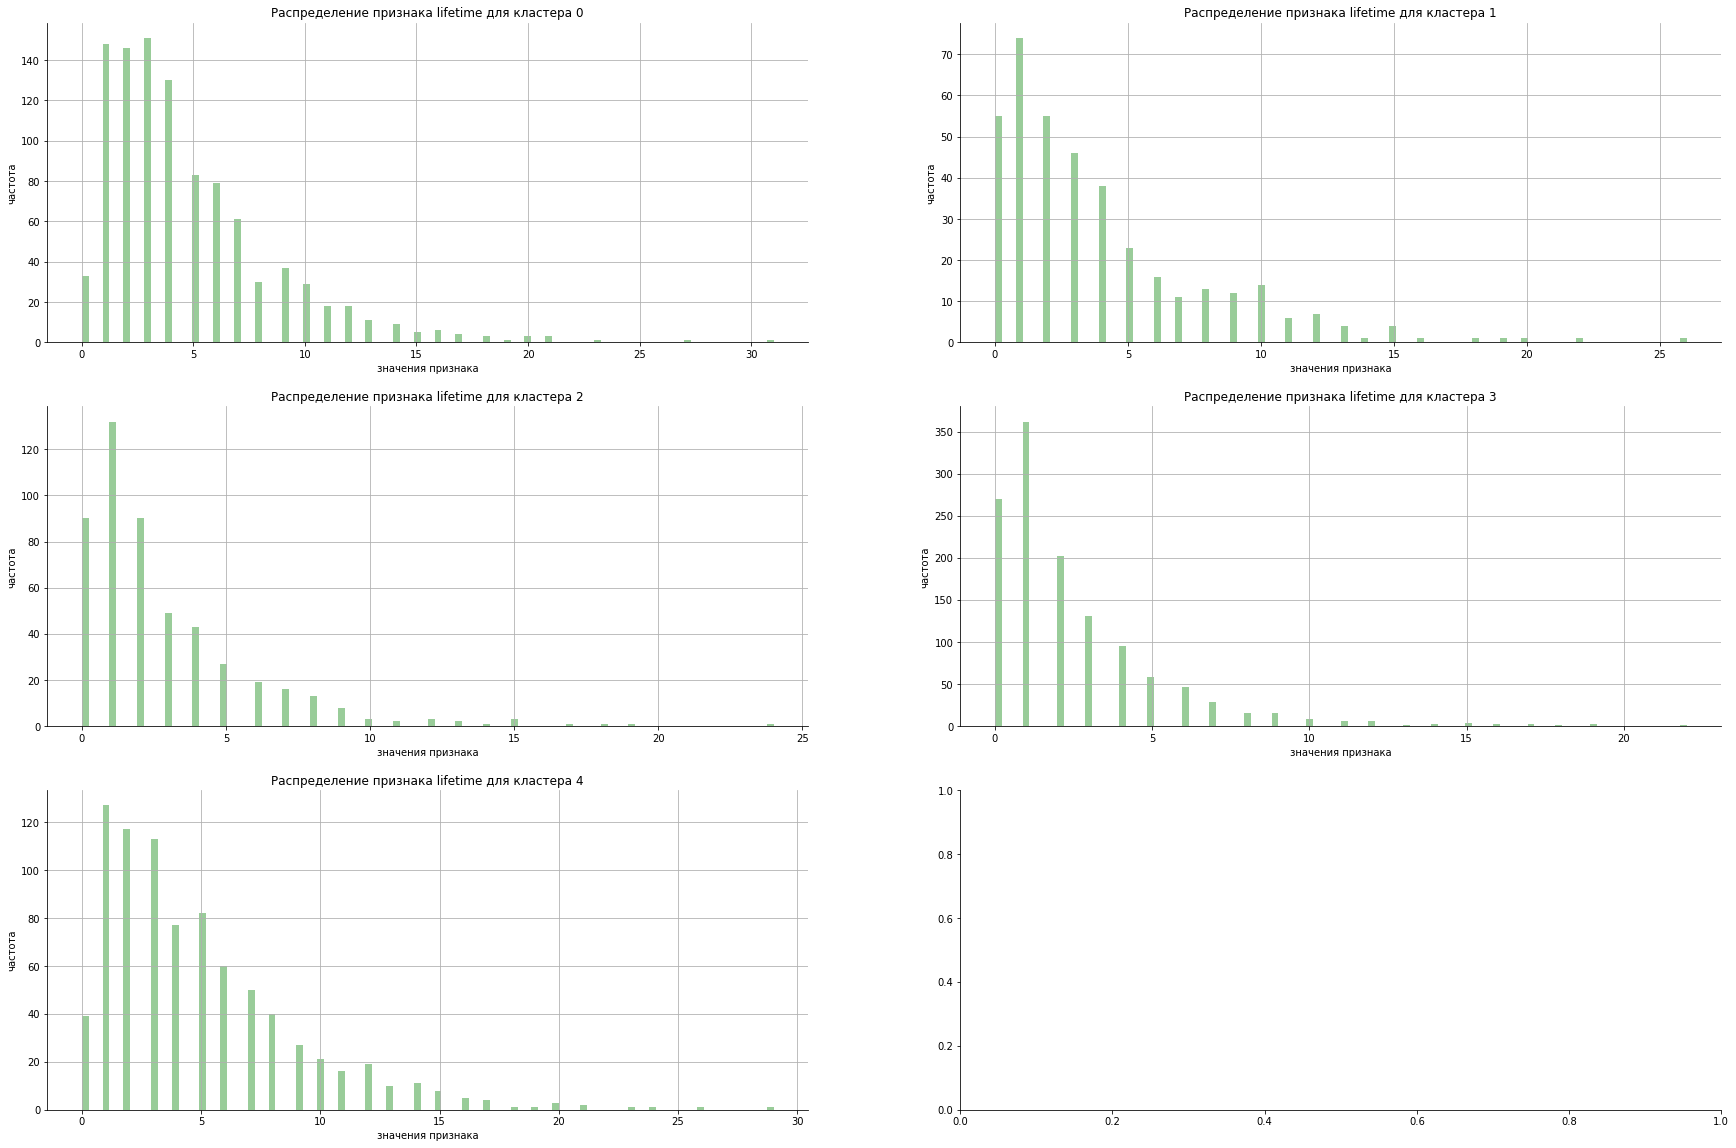

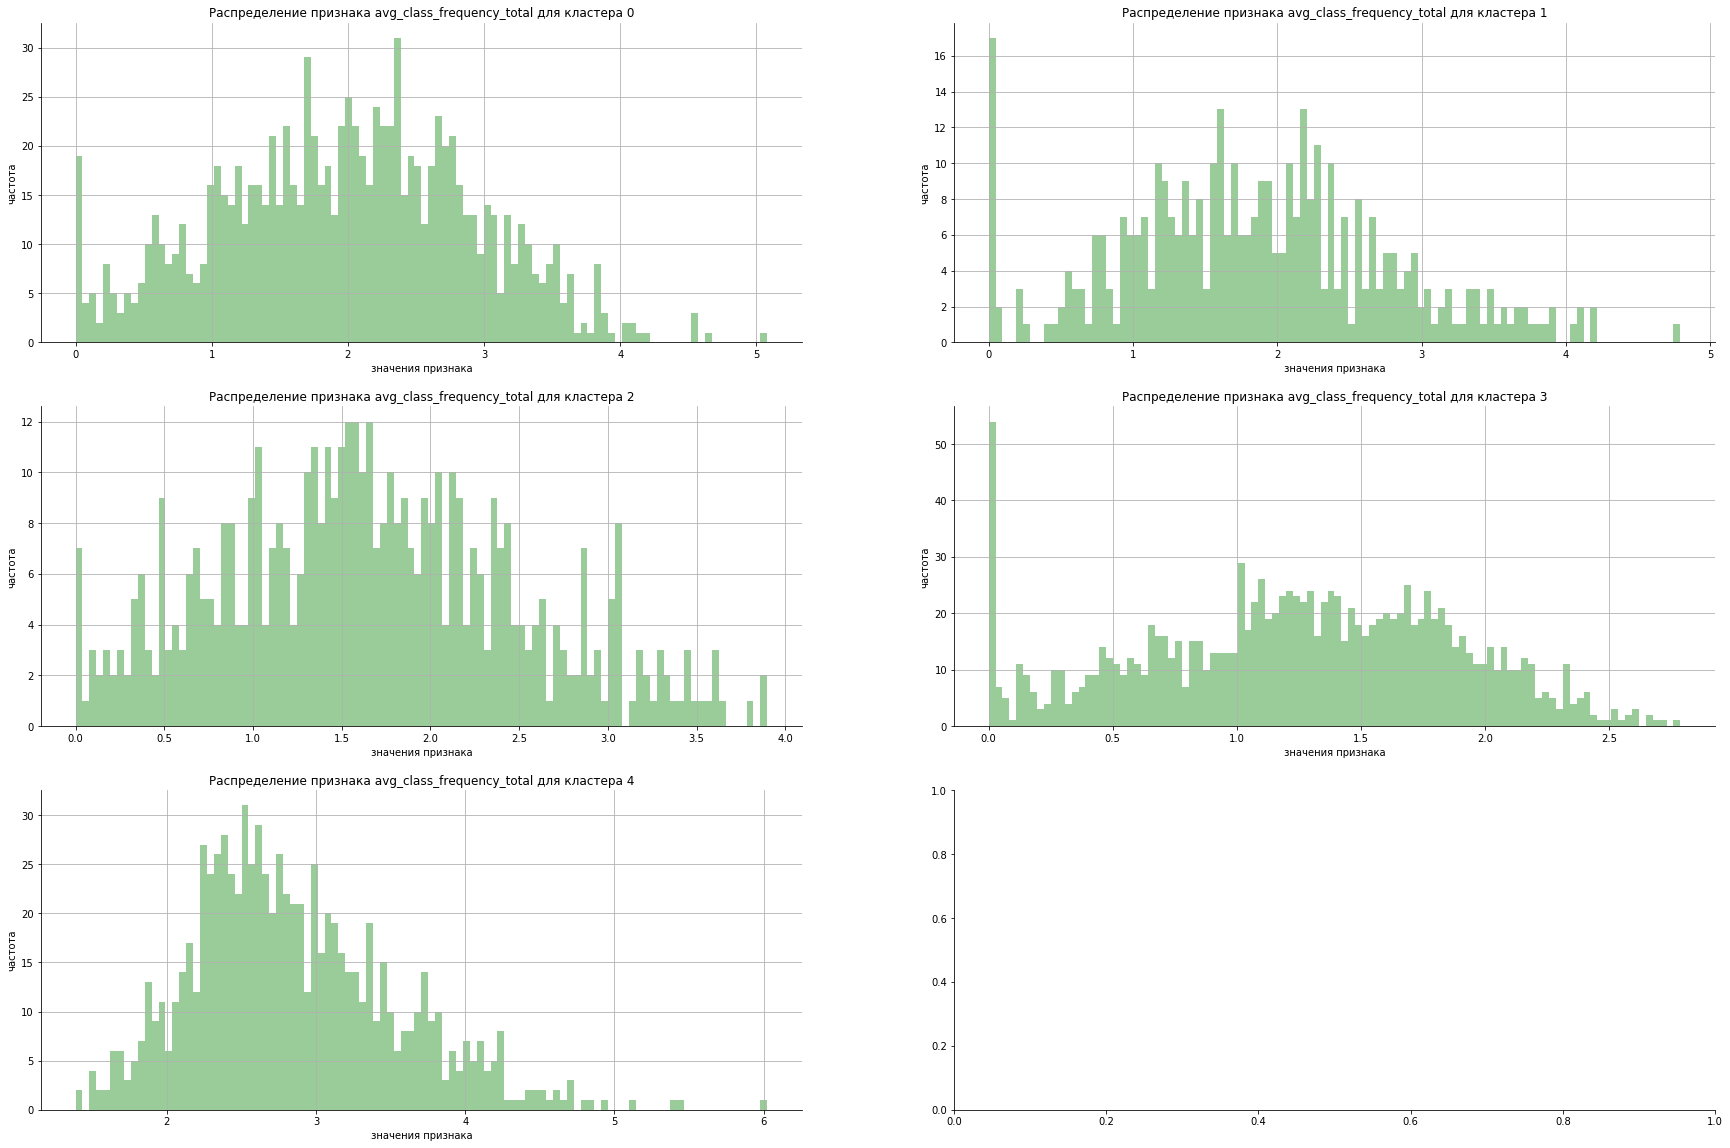

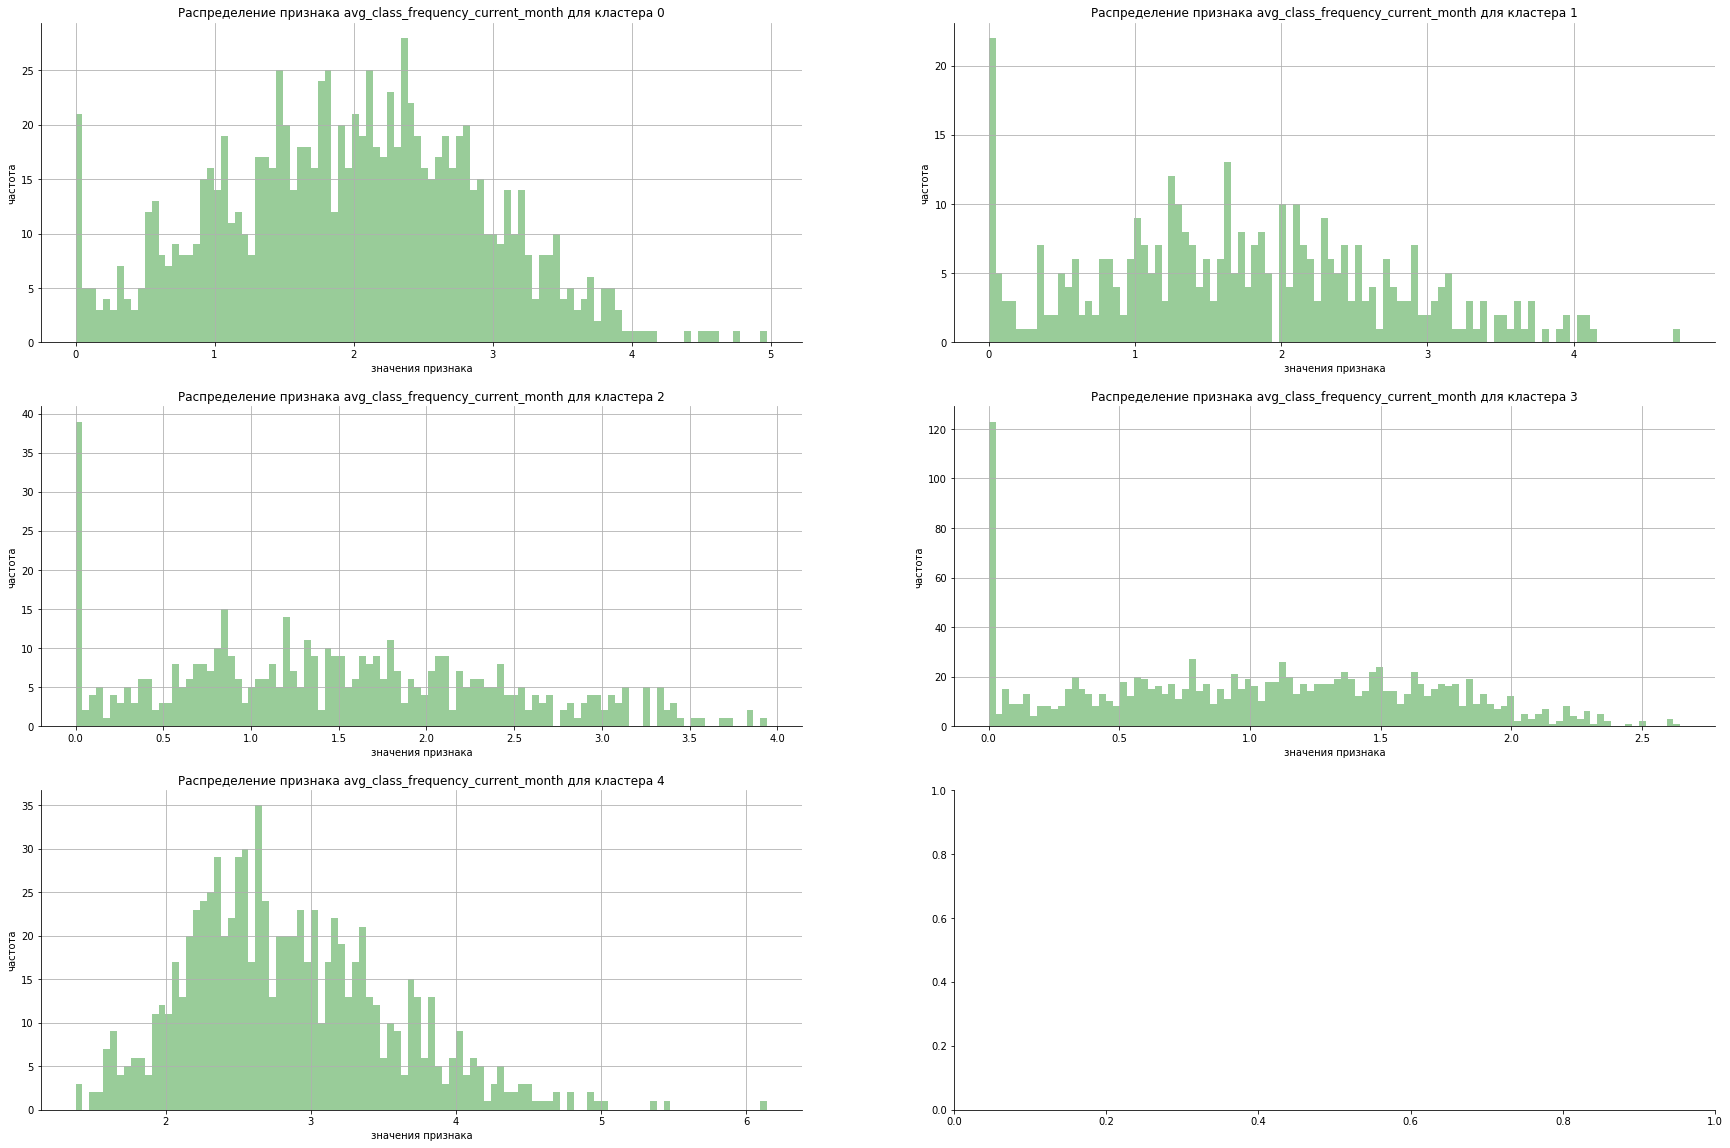

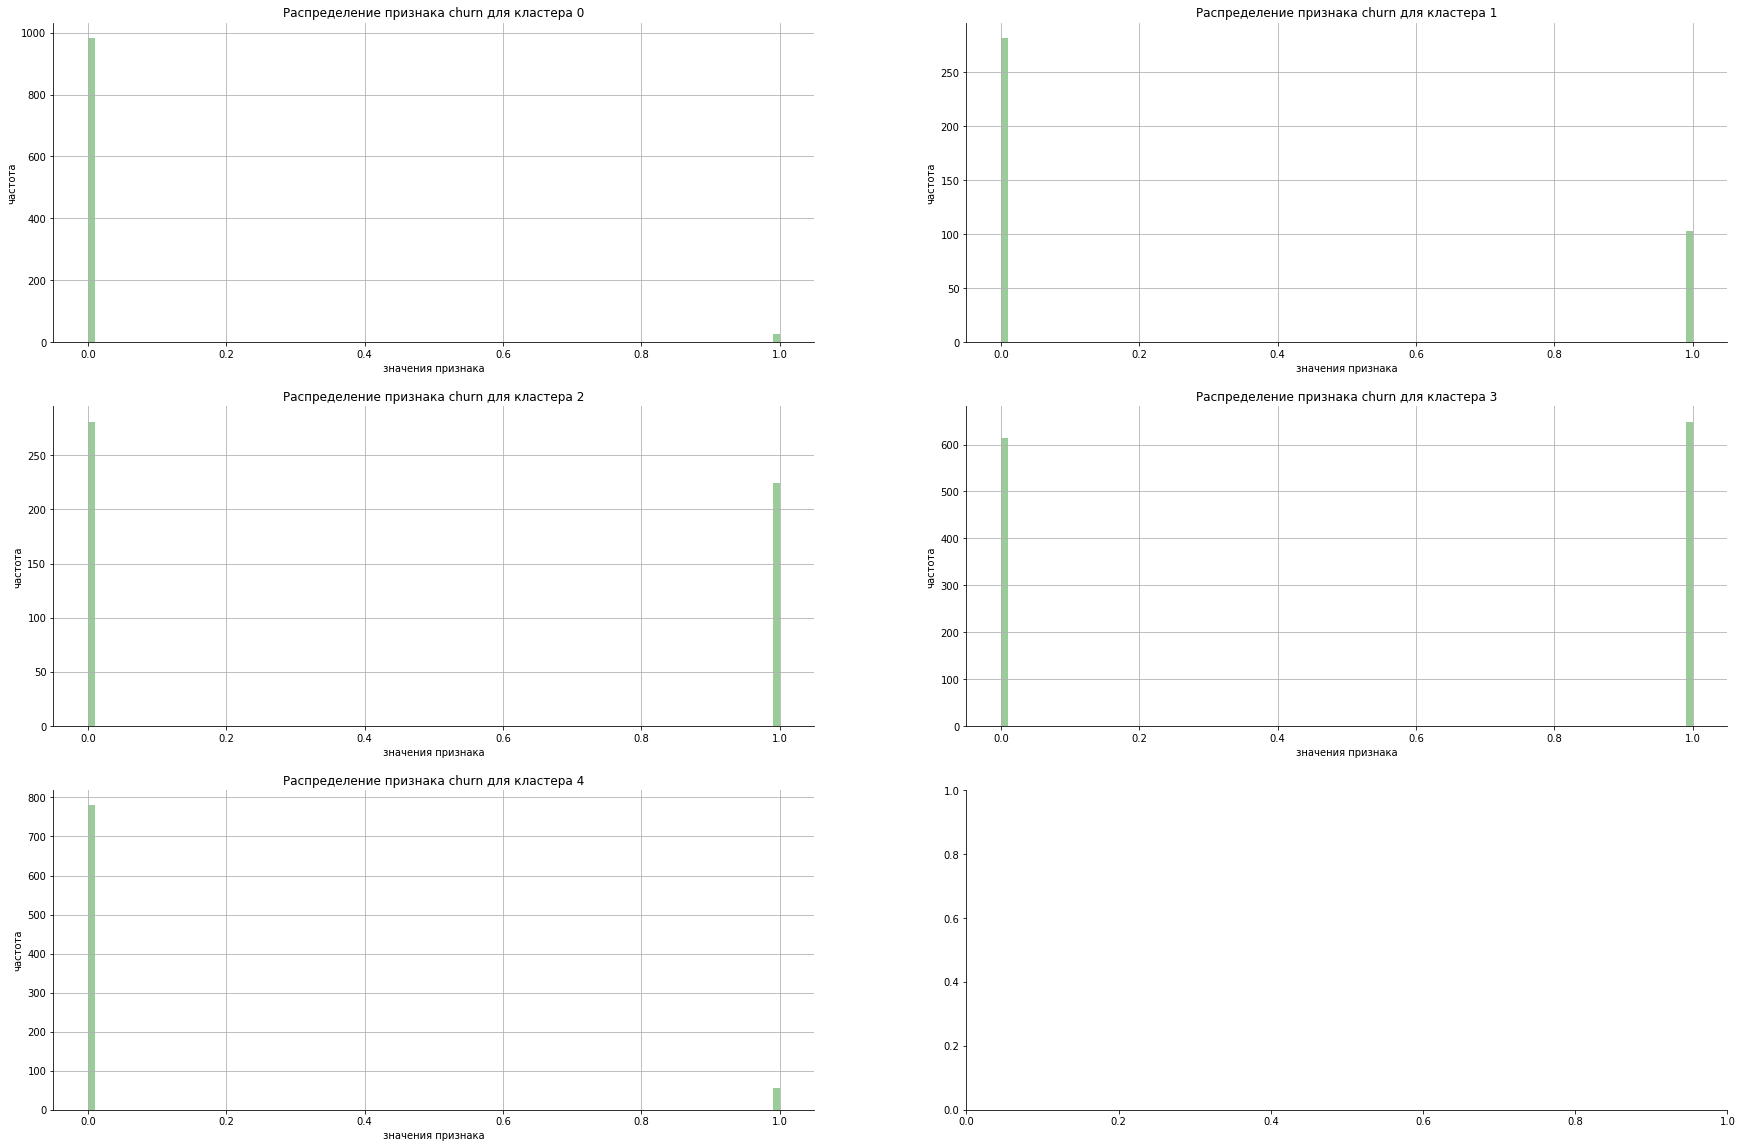

In [16]:
# функция для построения гистограммы 
def plotOne(df, col, cl, axI): 
    sns.distplot(df[col], bins = 100, color = 'green', kde= False, kde_kws = {'bw':0.1}, ax = axI)
    axI.set_xlabel('значения признака')
    axI.set_ylabel('частота')
    axI.set_title(f'Распределение признака {col} для кластера {cl}')
    axI.grid()
    sns.despine()

    
# функция с вызовом subplots() располагает гистограммы по каждому признаку и кластеру рядом 

def plot1(df, col, clusters):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (30, 20))
    plotOne(df.query(f'cluster == {clusters[0]}'), col, clusters[0], ax1)
    plotOne(df.query(f'cluster == {clusters[1]}'), col, clusters[1], ax2)
    plotOne(df.query(f'cluster == {clusters[2]}'), col, clusters[2], ax3)
    plotOne(df.query(f'cluster == {clusters[3]}'), col, clusters[3], ax4)
    plotOne(df.query(f'cluster == {clusters[4]}'), col, clusters[4], ax5)
    

# формируем 2 списка с названием признаков (колонок) и упорядоченным номером кластеров   

columns = df.drop(columns = ['cluster'], axis = 1).columns
clusters = sorted(df['cluster'].unique())


# перебираем признаки в цикле и для каждого признака рисуем гистограммы рядом 
for col in columns:
    plot1(df, col, clusters)
    

Гистограммы полностью подтверждают закономерности и выводы, обозначенные нами выше.

Детальное рассмотрение распределения признака `сontract_period` позволяет увидеть, что:
- в кластере 4 практически все клиенты предпочитают годовой абонемент,
- в кластерах 1, 2, 3 клиенты чаще покупают абонементы на 1 или 6 месяцев,
- в кластере 0 покупают абонементы на 1 месяц, но и 6- и 12-месячные абонементы одинаково популярны.

Распределение переменной `month_to_end_contract` показывает:
- чаще всего до истечения абонемента у всех кластеров остается 1 месяц,
- только в кластере 4 чаще всего остается 12 месяцев до истечения абонемента.

Распределение переменных `avg_class_frequency_total` и `avg_class_frequency_current_month` показывает:
- во всех кластерах, кроме 2, есть крупное пороговое значение около 0 - это значит, что есть очень много клиентов, которые вообще не посещали спортзал,
- только в кластере 2 нет таких клиентов, которые не ходили в спортзал.

Гистограмма для оттока клиентов (`churn`) показала, что:
- во всех кластерах, кроме 1, оставшихся клиентов больше, чем ушедших,
- практически все клиенты остались в кластерах 2 и 4,
- только в кластере 1 ушедших клиентов больше, чем оставшихся.

<div id='id-section21'/>

### [Посчитаем долю оттока клиентов для кластеров](#id-section44)

Для каждого полученного кластера методом `groupby()` посчитаем долю оттока методом `mean()` (эти же значения мы уже получали ранее, когда смотрели на средние значения всех признаков для кластеров). 

Результат выведем на график.

,cluster,churn
3,3,0.514263
2,2,0.443564
1,1,0.267532
4,4,0.068100
0,0,0.027695


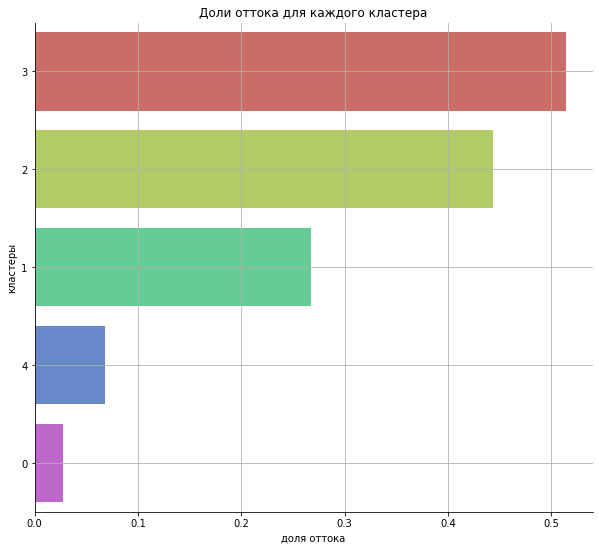

In [17]:
churn_share_by_cluster = df.groupby('cluster', as_index = False)['churn'].mean()\
.sort_values(by = 'churn', ascending = False)

display(churn_share_by_cluster)


plt.figure(figsize = (10, 9))
ax = sns.barplot(x = 'churn', y = 'cluster', orient = "h", order = churn_share_by_cluster['cluster'],\
                data = churn_share_by_cluster, palette = "hls")
ax.set_xlabel('доля оттока')
ax.set_ylabel('кластеры')
ax.set_title('Доли оттока для каждого кластера')
ax.grid()
sns.despine()

На графике мы четко видим, насколько сильно кластеры отличаются по доле оттока.

- **Наиболее склонен к оттоку** кластер 3.
- **Самыми надежными** кластерами с минимальной долей оттока являются 4 и 0.


<div id='id-section22'/>

### [Вывод](#id-section45)

Мы провели разбиение клиентов на 5 кластеров с помощью алгоритма`K-Means`. Проверка качества кластеризации метрикой силуэта показала **не очень высокое** значение (как и для числа кластеров = 4).   
- При этом надо отметить, что алгоритм `K-Means` основан на предположении, что число кластеров (групп) заранее известно. Это довольно сильное допущение, и часто выбор оптимального количества кластеров заслуживает дополнительного исследования.
- Будем считать, что **вопрос разбиения клиентов именно на 4 или 5 кластеров требует дополнительной проработки**.

Согласно получившемуся разбиению, **кластер 0 отличается от других следующими признаками:**
- практически все клиенты из кластера живут или работают в районе, где находится фитнес-центр (выше показатели только у кластера 4),
- примерно половина клиентов являются сотрудниками компании-партнера клуба,
- никто из клиентов не оставил свой телефон.

**Отличительные черты кластера 1:**
- нет клиентов, являющихся сотрудниками компании-партнера клуба,
- практически нет клиентов, пришедших по акции «приведи друга»,
- у клиентов самая маленькая средняя длительность текущего действующего абонемента и самый небольшой срок до окончания текущего действующего абонемента (почти 2 месяца), 
- самый небольшой средний возраст клиентов (28 лет),
- клиенты посещают фитнес-центр меньше всего времени - 2 месяца,
- самая маленькая средняя частота посещений в неделю всего и за последний месяц наблюдений - 1 раз в неделю.

**Отличительные черты кластера 2:**
- самый высокий средний возраст клиентов (30 лет),
- у клиентов самая большая средняя суммарная выручка от других услуг фитнес-центра,
- клиенты посещают фитнес-центр почти 5 месяцев (дольше всех),
- самая большая средняя частота посещений в неделю всего и за последний месяц наблюдений - 3 раза в неделю.

**Отличительные черты кластера 3:**
- самое маленькое количество клиентов, проживающих или работающих в районе, где находится фитнес-центр,
- все клиенты являются сотрудниками компании-партнера клуба,
- меньше всего клиентов посещают групповые занятия (в других кластерах больше),
- самый небольшой средний возраст клиентов (28 лет) наряду с кластером 1,
- у клиентов самая низкая средняя суммарная выручка от других услуг фитнес-центра,
- клиенты посещают фитнес-центр почти 3 месяца,
- самая маленькая средняя частота посещений в неделю всего и за последний месяц наблюдений - 1 раз в неделю (данный показатель чуть ниже только у кластера 1).

**Отличительные черты кластера 4:**
- самое большое количество клиентов живут или работают в районе, где находится фитнес-центр,
- большинство клиентов являются сотрудниками компании-партнера клуба (последний показатель выше только у кластера 3),
- почти половина клиентов пришли по акции «приведи друга»,
- у клиентов самая долгая средняя длительность текущего действующего абонемента (более 11 месяцев) и самый большой срок до окончания текущего действующего абонемента (10 месяцев),
- почти половина клиентов посещают групповые занятия (в других кластерах меньше),
- у клиентов самая большая средняя суммарная выручка от других услуг фитнес-центра (наряду с кластером 2).

Гистограммы полностью подтвердили все эти закономерности и выводы.

Детальное рассмотрение распределения признака `сontract_period` позволяет увидеть, что:
- в кластере 4 практически все клиенты предпочитают годовой абонемент,
- в кластерах 1, 2, 3 клиенты чаще покупают абонементы на 1 или 6 месяцев,
- в кластере 0 покупают абонементы на 1 месяц, но и 6- и 12-месячные абонементы одинаково популярны.

Распределение переменной `month_to_end_contract` показывает:
- чаще всего до истечения абонемента у всех кластеров остается 1 месяц,
- только в кластере 4 чаще всего остается 12 месяцев до истечения абонемента.

Распределение переменных `avg_class_frequency_total` и `avg_class_frequency_current_month` показывает:
- во всех кластерах, кроме 2, есть крупное пороговое значение около 0 - это значит, что есть очень много клиентов, которые вообще не посещали спортзал,
- только в кластере 2 нет таких клиентов, которые не ходили в спортзал.

Гистограмма для оттока клиентов (`churn`) показала, что:
- во всех кластерах, кроме 1, оставшихся клиентов больше, чем ушедших,
- практически все клиенты остались в кластерах 2 и 4,
- только в кластере 1 ушедших клиентов больше, чем оставшихся.

На графике с долей оттока клиентов для кластеров мы увидели, насколько сильно кластеры отличаются по доле оттока.

- **Наиболее склонен к оттоку** кластер 3.
- **Самыми надежными** кластерами с минимальной долей оттока являются 4 и 0.

<div id='id-section23'/>

## [Шаг 6. Сформулируем выводы и рекомендации по работе с клиентами](#id-section46)


**Исследовательский анализ данных** позволил нам установить:

- Среднее значение для признака `gender` по всему датасету (0.51) говорит о том, что в датасете примерно одинаковое количество анкет для мужчин и женщин. Мы видим, что различий по признаку пола в двух группах также нет - и среди ушедших, и среди оставшихся клиентов примерно равное количество мужчин и женщин.

- Большинство клиентов (и оставшиеся, и ушедшие) проживают или работают в районе, где находится фитнес-центр (показатель для ушедших клиентов, у которых фитнес не был рядом с работой или домом, немного выше - возможно, это и явилось причиной их ухода), а также почти всегда оставляют свой контактный телефон (скорее всего, это условие обязательно для записи в фитнес-центр).

- Клиенты, которые не ушли в отток, чаще являются сотрудниками компании-партнера клуба или пришли по акции «приведи друга» - видимо, это дает им преференции, которые не позволяют отказаться от посещения фитнес-центра, такие клиенты получают больше преимуществ и, как следствие, более лояльны.

- При этом акция «приведи друга» (использование промо-кода от знакомого при оплате первого абонемента) не пользуется большой популярностью, таких клиентов меньше, чем обычных (среднее значение признака `promo_friends` = 0.30).

- Средный возраст клиента равен 29 годам. Клиенты, которые продолжают ходить в фитнес-центр, на 3 года старше тех, кто ушел в отток (с возрастом необходимость регулярно заниматься спортом и следить за физической формой повышается).

- Оставшиеся клиенты чаще оформляют абонементы на более длительные сроки (6 или 12 месяцев), чем ушедшие. Видимо, как только у клиента появляется уверенность в желании посещать именно этот фитнес-центр, сразу принимается решение о покупке долгосрочного абонемента, так как это выгодно. Чем больше длительность абонемента, тем выше срок до его окончания. А ушедшие клиенты, наоборот, не уверены в том, захотят ли они и дальше посещать именно этот фитнес-центр, поэтому они покупают "пробный" короткий абонемент.

- Время с момента первого обращения клиента в фитнес-центр в среднем равно 4 месяцам. При этом распределение признака `lifetime` показывает, что клиенты принимают решение об уходе чаще всего после 1 месяца похода в спортзал. Зато оставшиеся клиенты посещают фитнес долго. Этот фактор связан с кардинально разной длительностью абонементов у двух групп.

- Общая частота посещений фитнес-центра в среднем составляет примерно 2 раза в неделю. Оставшиеся клиенты больше мотивированы на посещение спортзала, чем ушедшие - распределение показателей `avg_class_frequency_total` и `avg_class_frequency_current_month` говорит о том, что оставшиеся клиенты ходят на фитнес 2-3 раза в неделю, а ушедшие 1-2 раза в неделю, а в последний месяц они постепенно и вовсе переставали посещать спортзал, уходя в отток.

- Оставшиеся клиенты охотнее посещают групповые занятия, чем ушедшие. Возможно, это более второстепенный формат, на первом месте для клиентов все же индивидуальные занятия.

- Чем дольше клиенты посещают фитнес-центр, тем выше их дополнительные траты на другие услуги фитнес-центра: кафе, спорт-товары, косметический и массажный салон. Этим объясняется разница в показателе `avg_additional_charges_total` для оставшихся и ушедших клиентов. При этом доля мелких трат выше у ушедших клиентов (возможно, они пытались оценить весь ассортимент услуг, прежде чем принять решение об уходе).


Построение **модели бинарной классификации клиентов** при условии **несбалансированности классов** (клиентов, которые не ушли в отток, почти в 3 раза больше, чем тех, кто ушел), показало следующие результаты.

- При сравнении метрики `Precision` (доля правильных ответов только среди целевого класса - 1) и `Recall` (показывает, сколько реальных объектов класса 1 мы смогли обнаружить с помощью модели) оказалось, что точность (`Precision`) у моделей логистической регрессии и случайного леса одинакова, а по полноте (`Recall`) выигрывает `LogisticRegression()`.

- `F1-метрика` учитывает баланс между метриками `Precision` и `Recall` - по ней также лидирует `LogisticRegression()`.

- Для оценки качества модели классификации мы применили метрику `ROC_AUC` (показывает, насколько хорошо будут выделяться реальные классы объектов, если отсортировать объекты по вероятности, которую спрогнозировала модель). Согласно данной метрике, обе модели ведут себя адекватно, неплохо сортируют объекты, не называют класс наугад, но с небольшим отрывом побеждает `LogisticRegression()`.

- Мы можем сделать вывод, что **модель `LogisticRegression()` показала себя лучше** на основании метрик.

Когда мы заново обучили лучшую модель (`LogisticRegression()`) на train-выборке и сделали прогноз на валидационных данных, при интерпретации модели оказалось, что наиболее важным признаком модель посчитала `gender`.
- Вместе с тем, необходимо отметить, что коэффициенты важности, которые присваивает модель `LogisticRegression()`, сложны для прямой интерпретации и требуют дополнительных исследований.


Мы провели **разбиение клиентов на 5 кластеров** с помощью алгоритма`K-Means`. Проверка качества кластеризации метрикой силуэта показала **не очень высокое** значение (как и для числа кластеров = 4).   
- При этом надо отметить, что алгоритм `K-Means` основан на предположении, что число кластеров (групп) заранее известно. Это довольно сильное допущение, и часто выбор оптимального количества кластеров заслуживает дополнительного исследования.
- Будем считать, что **вопрос разбиения клиентов именно на 4 или 5 кластеров требует дополнительной проработки**.


На графике с долей оттока клиентов для кластеров мы увидели, насколько сильно кластеры отличаются по доле оттока.

- **Наиболее склонен к оттоку** кластер 3.
- **Самыми надежными** кластерами с минимальной долей оттока являются 4 и 0.

(➕) **Кластер 4 отличается от других следующими признаками:**
- самое большое количество клиентов живут или работают в районе, где находится фитнес-центр,
- большинство клиентов являются сотрудниками компании-партнера клуба (последний показатель выше только у кластера 3),
- почти половина клиентов пришли по акции «приведи друга»,
- у клиентов самая долгая средняя длительность текущего действующего абонемента (более 11 месяцев) и самый большой срок до окончания текущего действующего абонемента (10 месяцев),
- почти половина клиентов посещают групповые занятия (в других кластерах меньше),
- у клиентов самая большая средняя суммарная выручка от других услуг фитнес-центра (наряду с кластером 2).

(➕) **Отличительные черты кластера 0:**
- самый высокий средний возраст клиентов (30 лет),
- у клиентов самая большая средняя суммарная выручка от других услуг фитнес-центра,
- клиенты посещают фитнес-центр почти 5 месяцев (дольше всех),
- самая большая средняя частота посещений в неделю всего и за последний месяц наблюдений - 3 раза в неделю.

(➖) **Отличительные черты ненадежного кластера 3:**
- нет клиентов, являющихся сотрудниками компании-партнера клуба,
- практически нет клиентов, пришедших по акции «приведи друга»,
- у клиентов самая маленькая средняя длительность текущего действующего абонемента и самый небольшой срок до окончания текущего действующего абонемента (почти 2 месяца), 
- самый небольшой средний возраст клиентов (28 лет),
- клиенты посещают фитнес-центр меньше всего времени - 2 месяца,
- самая маленькая средняя частота посещений в неделю всего и за последний месяц наблюдений - 1 раз в неделю.


💡 Учитывая изложенное, мы можем предложить следующие **рекомендации для стратегии взаимодействия с клиентами и их удержания:**

1. Ориентация на открытие новых фитнес-клубов сети рядом с жилыми комплексами и крупными бизнес-центрами.

2. Развитие сотрудничества с компаниями (чтобы как можно больше компаний становились партнерами клуба) и реализация новых акций (помимо акции «приведи друга»). 

3. Организация рекламной кампании для привлечения клиентов старшего возраста (они более лояльны).

4. Организация масштабной рекламной кампании с привлечением инфлюенсеров, ориентированной на клиентов молодого возраста (до 25 лет), - чтобы максимально заинтересовать нелояльных клиентов. 

5. Стимулирование клиентов к покупке длительных абонементов на 6-12 месяцев (с привлекательной ценой, большим выбором дополнительных услуг и программ тренировок). Целью является формирование у клиентов установки на то, что покупка длительного абонемента выгоднее покупки короткого, "пробного".

6. После 1-го месяца посещения спортзала предлагать клиентам скидки на дополнительные услуги (так как именно после 1-го месяца чаще всего клиентом принимается решение об уходе).

7. Отправка ненавязчивых смс- или push-уведомлений на телефоны клиентов, которые купили абонемент, но ни разу не пришли в спортзал.

8. Также можно рассмотреть вопрос о периодической отправке уведомлений тем клиентам, которые ходят в спортзал 1 раз в неделю.
